# <u>Hospitality-Data-Insights-and-Cancellation-Prediction</u>

[GitHub Link](https://github.com/ajitmane36/hospitality-data-insights-and-cancellation-prediction-model.git) 

#### Problem Statement

- Analyse the data to find trends, customer behaviour, and factors influencing cancellation for the hospitality industry. The goal is to build a predictive model that forecasts cancellations and provides insight into a given dataset.

In [2]:
# Import dependancies
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

#### Dataset

In [3]:
# Load dataset
df=pd.read_csv(r"C:\Users\ajitm\Data Science Cources\Deep Learning Projects\hospitality-data-insights-and-cancellation-prediction-model\hotel_bookings.csv")
pd.set_option('display.max_columns', None)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [4]:
# shape
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 119390 rows and 32 columns.


In [5]:
# Columns
print(f'Column names: {df.columns}')
print(f"{'--'*50} \n Dataset has {len(df.columns)} columns")

Column names: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
---------------------------------------------------------------------------------------------------- 
 Dataset has 32 columns


In [6]:
# Dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- Feature children, country, agent and company has nulls.

In [7]:
# Duplicates
print(f"Dataset has {df.duplicated().sum()} duplicates.")
# remove duplicates
df.drop_duplicates(inplace=True)
print(f"{'--'*50} \n SHape of dataset after prforming drop duplicates: {df.shape}")

Dataset has 31994 duplicates.
---------------------------------------------------------------------------------------------------- 
 SHape of dataset after prforming drop duplicates: (87396, 32)


In [8]:
# Handle nulls
null_df=pd.DataFrame({'column':df.columns, 'null_count':df.isna().sum(), '%_null':round(((df.isna().sum()/len(df))*100),4)}).set_index('column')
null_df

null_count   %_null
column                                             
hotel                                    0   0.0000
is_canceled                              0   0.0000
lead_time                                0   0.0000
arrival_date_year                        0   0.0000
arrival_date_month                       0   0.0000
arrival_date_week_number                 0   0.0000
arrival_date_day_of_month                0   0.0000
stays_in_weekend_nights                  0   0.0000
stays_in_week_nights                     0   0.0000
adults                                   0   0.0000
children                                 4   0.0046
babies                                   0   0.0000
meal                                     0   0.0000
country                                452   0.5172
market_segment                           0   0.0000
distribution_channel                     0   0.0000
is_repeated_guest                        0   0.0000
previous_cancellations                   0   0.0000
previous_bookings_not_canceled           0   0.0000
reserved_room_type                       0   0.0000
assigned_room_type                       0   0.0000
booking_changes                          0   0.0000
deposit_type                             0   0.0000
agent                                12193  13.9514
company                              82137  93.9826
days_in_waiting_list                     0   0.0000
customer_type                            0   0.0000
adr                                      0   0.0000
required_car_parking_spaces              0   0.0000
total_of_special_requests                0   0.0000
reservation_status                       0   0.0000
reservation_status_date                  0   0.0000

- Feature children, country, agent and company has nulls.

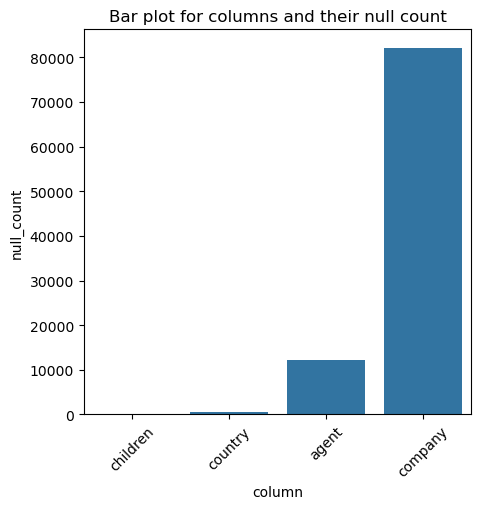

In [9]:
# Visualize Nulls
plt.figure(figsize=(5,5))
ax = sns.barplot(x='column', y='null_count', data=null_df[null_df['null_count'] > 0])
ax.set_title('Bar plot for columns and their null count')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Identify columns with null values
null_clo = df.columns[df.isnull().any()].tolist()

for col in null_clo:
    print(f"{'--'*50} \n {df[col].value_counts()}")

---------------------------------------------------------------------------------------------------- 
 children
0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64
---------------------------------------------------------------------------------------------------- 
 country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64
---------------------------------------------------------------------------------------------------- 
 agent
9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: count, Length: 333, dtype: int64
---------------------------------------------------------------------------------------------------- 
 company
40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ..

In [11]:
## Replace nulls

# company feature have 93% null so remove this column
df.drop(columns='company', inplace=True)
# Replce children, country and agent feature with its mode
for col in ['children', 'country','agent']:
    df.fillna(df[col].mode()[0], inplace=True)

In [12]:
# Verify nulls
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [13]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  C                3   No Deposit    0.0   
1                  C                4   No Deposit    0.0   
2                  C                0   No Deposit    0.0   
3                  A                0   No Deposit  304.0   
4                  A                0   No Deposit  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [14]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

- Features 'children' and 'agent' are in float type, convert them to apropriate data type int.
- Feature 'reservation_status_date' is in object format, nned to convert to date format.

In [15]:
# Find categorical and numerical variable
categorical_var = [var for var in df.columns if df[var].dtype == 'object']
numerical_var = [var for var in df.columns if var not in categorical_var]

discrete_var = [var for var in numerical_var if df[var].nunique() < 100]
continuous_var = [var for var in numerical_var if var not in discrete_var]

# Print variables
print(f"Categorical Variables : \n {categorical_var} \n {'--'*50} \n Numericals Variables : \n {numerical_var} \n {'--'*50}")
print(f"Discreate Variables : \n {discrete_var} \n {'--'*50} \n Contineous Variables : \n {continuous_var} \n {'--'*50}")

Categorical Variables : 
 ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'] 
 ---------------------------------------------------------------------------------------------------- 
 Numericals Variables : 
 ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'] 
 ----------------------------------------------------------------------------------------------------
Discreate Variables : 
 ['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_week

In [16]:
# Checking categories in ccontinuous_var
for i in continuous_var:
    print(f'{df[i].value_counts()} \n {'--'*50}')

lead_time
0      5978
1      3216
2      1927
3      1704
4      1570
       ... 
410       1
411       1
371       1
532       1
463       1
Name: count, Length: 479, dtype: int64 
 ----------------------------------------------------------------------------------------------------
agent
9.0      28759
240.0    13028
0.0      12193
14.0      3349
7.0       3300
         ...  
257.0        1
291.0        1
93.0         1
483.0        1
449.0        1
Name: count, Length: 334, dtype: int64 
 ----------------------------------------------------------------------------------------------------
days_in_waiting_list
0      86536
63        53
87        25
44        23
15        22
       ...  
79         1
120        1
160        1
85         1
36         1
Name: count, Length: 128, dtype: int64 
 ----------------------------------------------------------------------------------------------------
adr
0.00      1778
75.00     1320
65.00     1260
48.00      878
85.00      858
          ... 
55.

______________________________________________________________________________


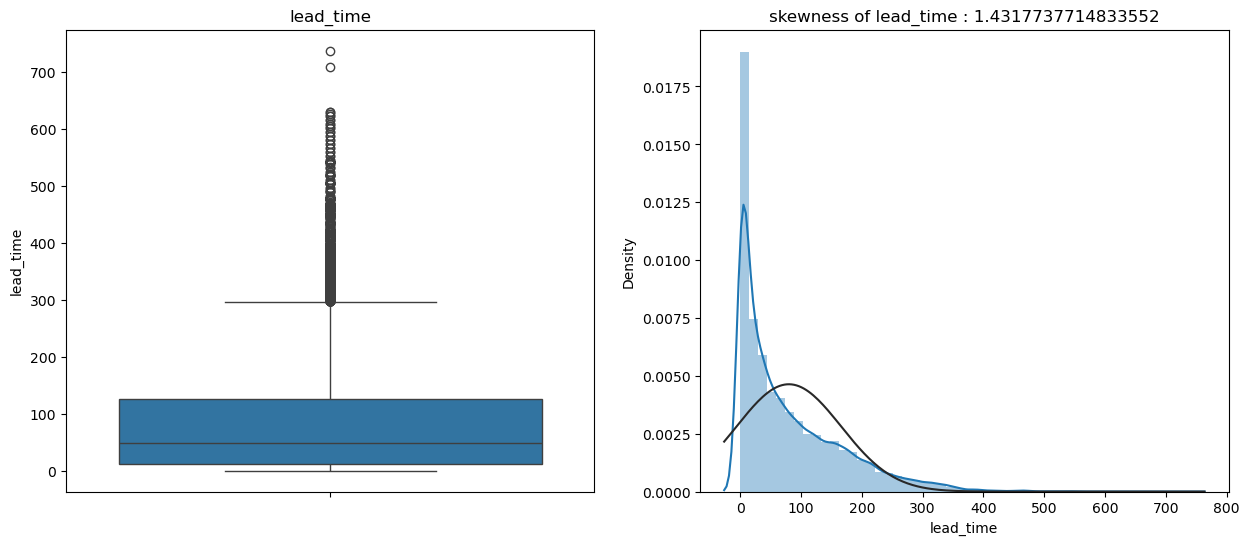

______________________________________________________________________________


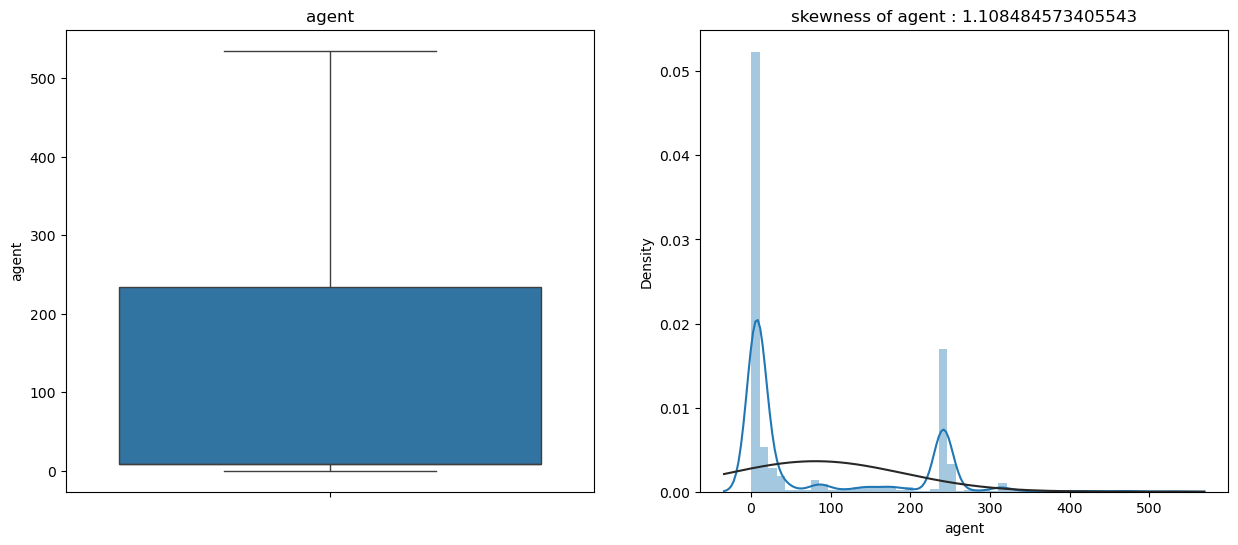

______________________________________________________________________________


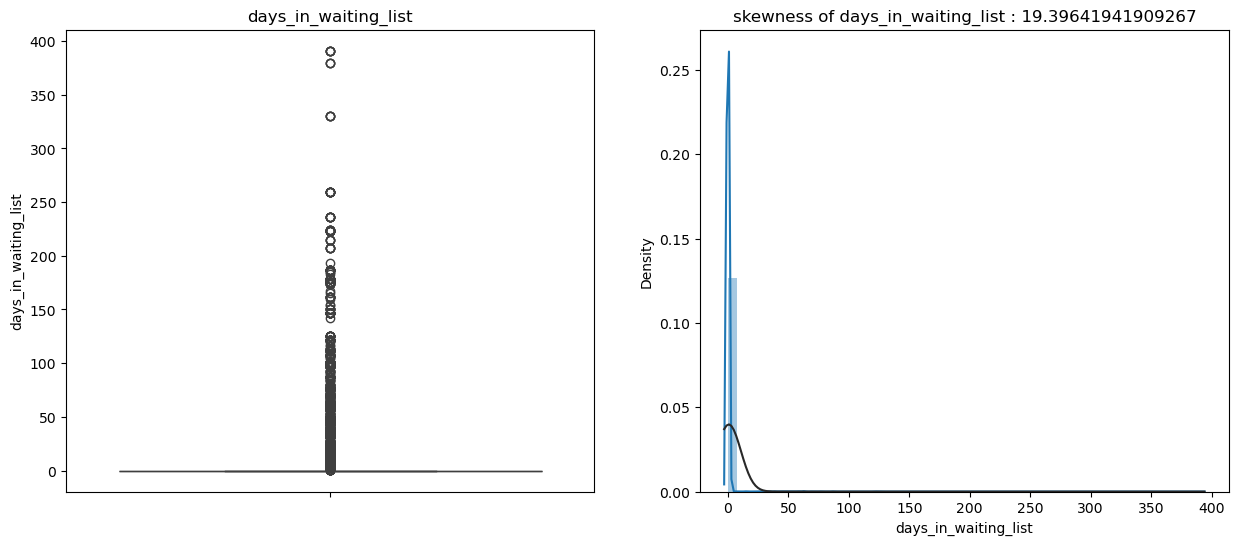

______________________________________________________________________________


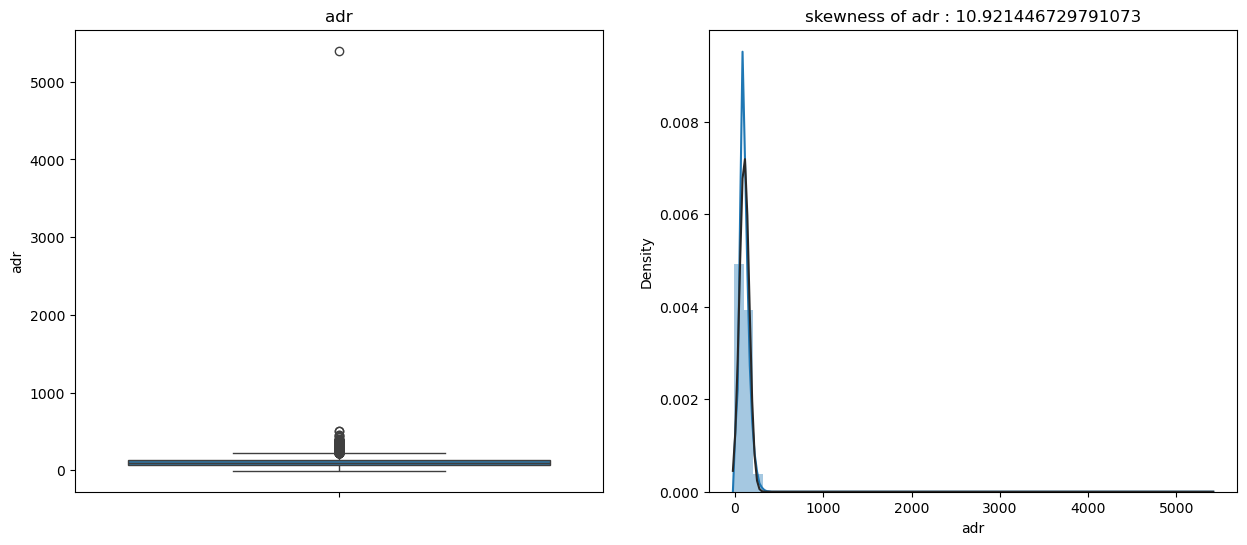

In [17]:
# Checking outliers using boxplot
from scipy.stats import norm
for i in continuous_var:
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data=df[i])
  ax.set_title(f'{i}')
  ax.set_ylabel(i)

  plt.subplot(1,2,2)
  ax=sns.distplot(df[i], fit=norm)
  ax.set_title(f'skewness of {i} : {df[i].skew()}')
  ax.set_xlabel(i)
  print('__'*39)
  plt.show()

- Feature `agent` has ID's of agent who booked hotel booking, so it can be excluded.
- The feature `days_in_waiting_list` has a flattened distribution because most values are zero. To address this, we can adjust the IQR multiplier to retain more meaningful information while performing outlier treatment. By lowering the multiplier, we make the outlier detection less stringent, which helps preserve valuable data in features with skewed distributions or significant zero values.
- All other contineous variables contain outliers and does not perform normal distrubution so IQR technique can be used to treat outliers.

In [18]:
df.shape

(87396, 31)

In [19]:
# Removing outliers using IQR 

def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Removes outliers from specified columns of a DataFrame using the IQR method.
    """
    for col in columns:
        # IQR 
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        # Remove outliers from the DataFrame
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df
# Apply the function to the specified features in place
variabls = ['lead_time', 'adr']
df = remove_outliers_iqr(df, variabls, multiplier=1.5)
df = remove_outliers_iqr(df, ['days_in_waiting_list'], multiplier=0.5)

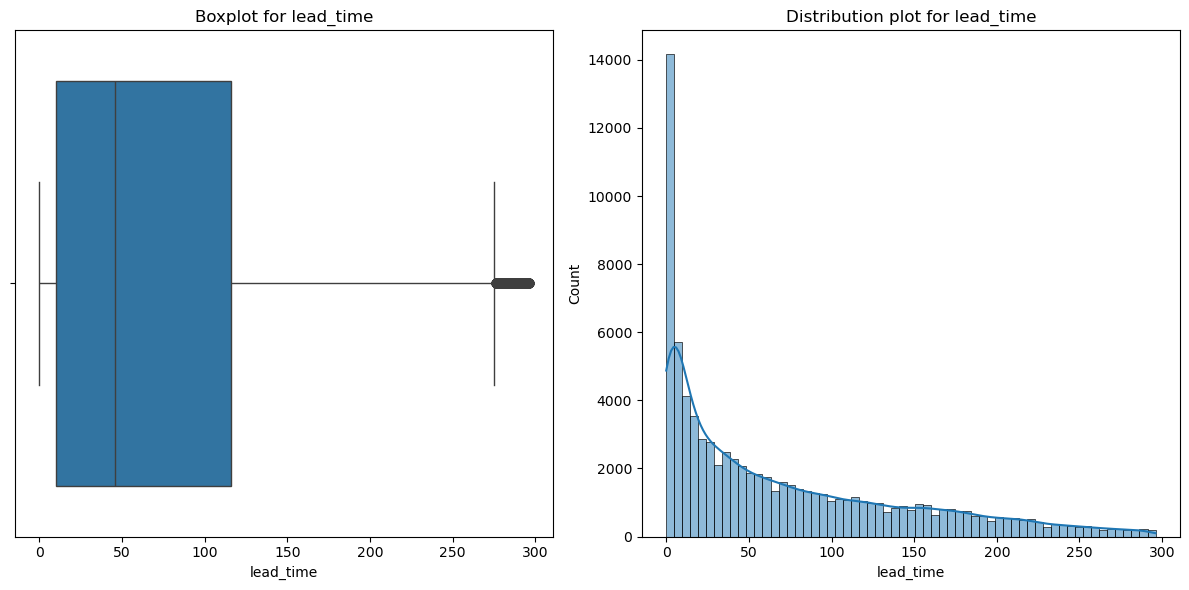

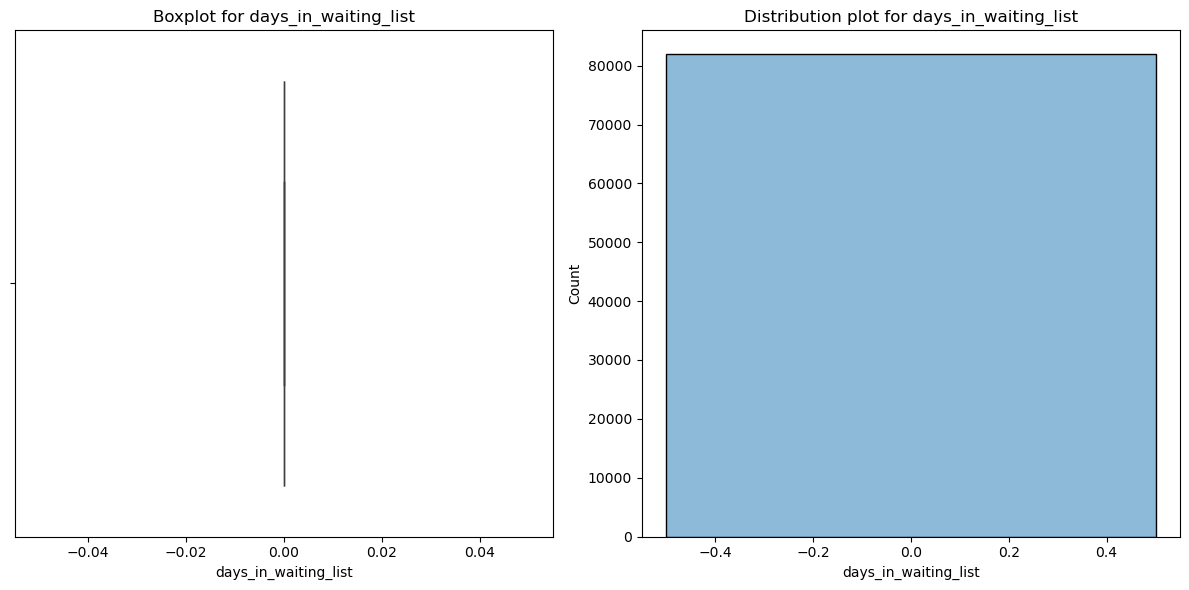

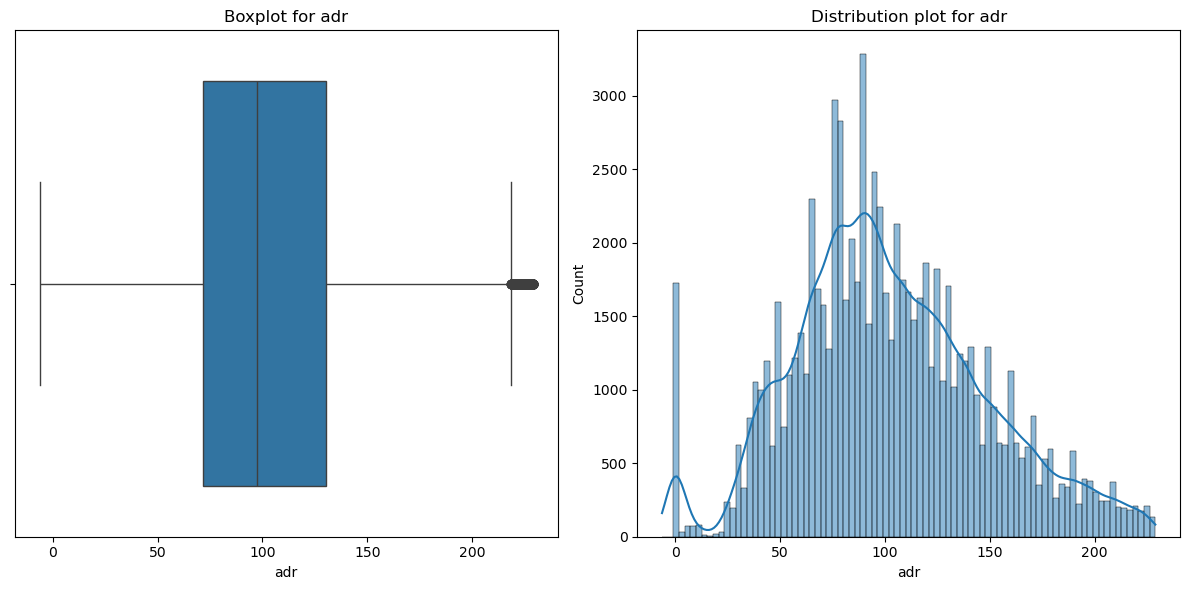

In [20]:
# Verify outliers treatment
for i in ['lead_time', 'days_in_waiting_list','adr']:
    plt.figure(figsize=(12, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1) 
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    
    # Distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(df[i], kde=True) 
    plt.title(f'Distribution plot for {i}')
    plt.tight_layout()
    plt.show()

#### Feature Engineering

In [21]:
## Assigning appropriate data type to featuresa
df[['children','agent']]=df[['children','agent']].astype('int64')
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

In [22]:
# verifing chenges
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81911 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           81911 non-null  object        
 1   is_canceled                     81911 non-null  int64         
 2   lead_time                       81911 non-null  int64         
 3   arrival_date_year               81911 non-null  int64         
 4   arrival_date_month              81911 non-null  object        
 5   arrival_date_week_number        81911 non-null  int64         
 6   arrival_date_day_of_month       81911 non-null  int64         
 7   stays_in_weekend_nights         81911 non-null  int64         
 8   stays_in_week_nights            81911 non-null  int64         
 9   adults                          81911 non-null  int64         
 10  children                        81911 non-null  int64         
 11  babies

In [23]:
# Creating new meaningfull feature
df['total_stays']=df.stays_in_week_nights+df.stays_in_weekend_nights
df['total_people']=df.adults+df.babies+df.children
df['total_childrens']=df.children+df.babies
df['reserved_room_assigned']=np.where(df.reserved_room_type==df.assigned_room_type, 'yes', 'no')
df['guest_category']=np.where(df.total_people==1, 'single', np.where(df.total_people==2, 'couple', 'family'))
df['lead_time_category']=np.where(df.lead_time<=30, 'low', np.where((df.lead_time>=31) & (df.lead_time<=90), 'medium', 'high'))

# Convert the datetime64 column into separate features
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_day'] = df['reservation_status_date'].dt.day

# Drop unnecessary features after new features created
df.drop(columns=['stays_in_week_nights','stays_in_weekend_nights','adults','children','babies','reserved_room_type', 'assigned_room_type', 'total_people', 'lead_time', 'reservation_status_date'], inplace=True, axis=1)

In [24]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81911 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           81911 non-null  object 
 1   is_canceled                     81911 non-null  int64  
 2   arrival_date_year               81911 non-null  int64  
 3   arrival_date_month              81911 non-null  object 
 4   arrival_date_week_number        81911 non-null  int64  
 5   arrival_date_day_of_month       81911 non-null  int64  
 6   meal                            81911 non-null  object 
 7   country                         81911 non-null  object 
 8   market_segment                  81911 non-null  object 
 9   distribution_channel            81911 non-null  object 
 10  is_repeated_guest               81911 non-null  int64  
 11  previous_cancellations          81911 non-null  int64  
 12  previous_bookings_not_canceled  8191

In [25]:
df.head()

hotel  is_canceled  arrival_date_year arrival_date_month  \
2  Resort Hotel            0               2015               July   
3  Resort Hotel            0               2015               July   
4  Resort Hotel            0               2015               July   
6  Resort Hotel            0               2015               July   
7  Resort Hotel            0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month meal country  \
2                        27                          1   BB     GBR   
3                        27                          1   BB     GBR   
4                        27                          1   BB     GBR   
6                        27                          1   BB     PRT   
7                        27                          1   FB     PRT   

  market_segment distribution_channel  is_repeated_guest  \
2         Direct               Direct                  0   
3      Corporate            Corporate                  0   
4      Online TA                TA/TO                  0   
6         Direct               Direct                  0   
7         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled  booking_changes  \
2                       0                               0                0   
3                       0                               0                0   
4                       0                               0                0   
6                       0                               0                0   
7                       0                               0                0   

  deposit_type  agent  days_in_waiting_list customer_type    adr  \
2   No Deposit      0                     0     Transient   75.0   
3   No Deposit    304                     0     Transient   75.0   
4   No Deposit    240                     0     Transient   98.0   
6   No Deposit      0                     0     Transient  107.0   
7   No Deposit    303                     0     Transient  103.0   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
2                            0                          0          Check-Out   
3                            0                          0          Check-Out   
4                            0                          1          Check-Out   
6                            0                          0          Check-Out   
7                            0                          1          Check-Out   

   total_stays  total_childrens reserved_room_assigned guest_category  \
2            1                0                     no         single   
3            1                0                    yes         single   
4            2                0                    yes         couple   
6            2                0                    yes         couple   
7            2                0                    yes         couple   

  lead_time_category  reservation_year  reservation_month  reservation_day  
2                low              2015                  7                2  
3                low              2015                  7                2  
4                low              2015                  7                3  
6                low              2015                  7                3  
7                low              2015                  7                3

#### EDA

In [26]:
# Obtaining target variables
excluded_var=[var for var in df.columns if len(df[var].value_counts())>15]
included_var=[var for var in df.columns if var not in excluded_var]
print(f"Excluded variable: {excluded_var} \n {'--'*50} \n Included Variables {included_var}")

Excluded variable: ['arrival_date_week_number', 'arrival_date_day_of_month', 'country', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'adr', 'total_stays', 'reservation_day'] 
 ---------------------------------------------------------------------------------------------------- 
 Included Variables ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'total_childrens', 'reserved_room_assigned', 'guest_category', 'lead_time_category', 'reservation_year', 'reservation_month']


In [27]:
# Defining r to autofit the number and size of plots
r = int(len(included_var) / 3 + 1)

# Defining a function to annotate the percent count of each value
def annot_percent(ax):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in ax.patches:
        total = sum([p.get_height() for p in ax.patches]) 
        percent = round((p.get_height() / total) * 100, 2) 
        x = p.get_x() + p.get_width() / 2 
        y = p.get_height()
        ax.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

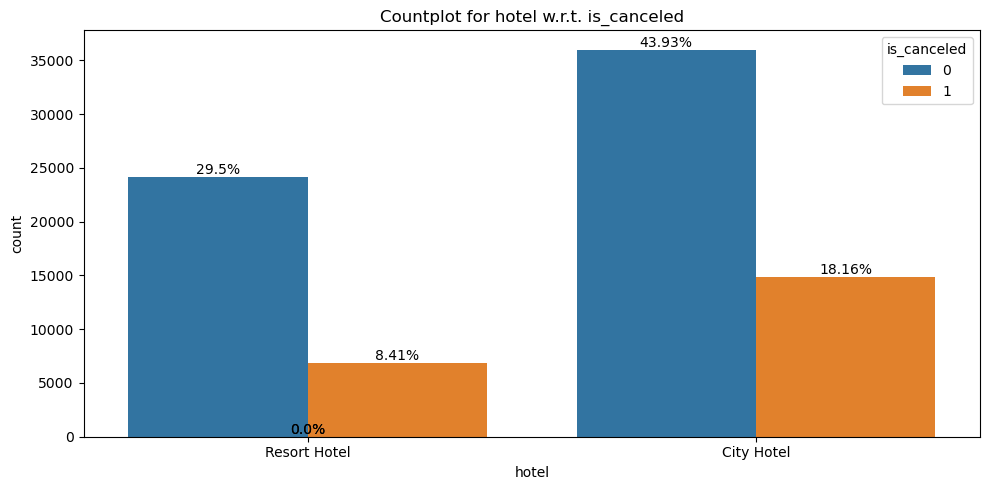

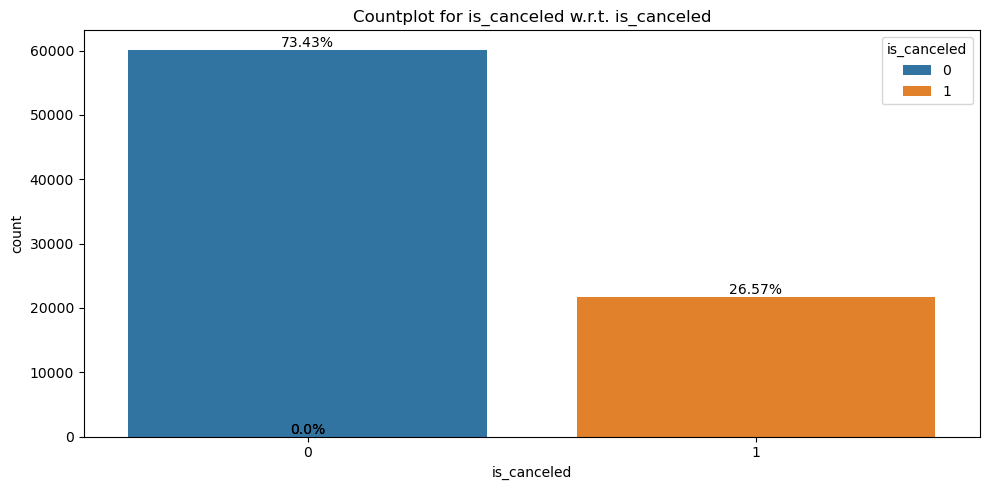

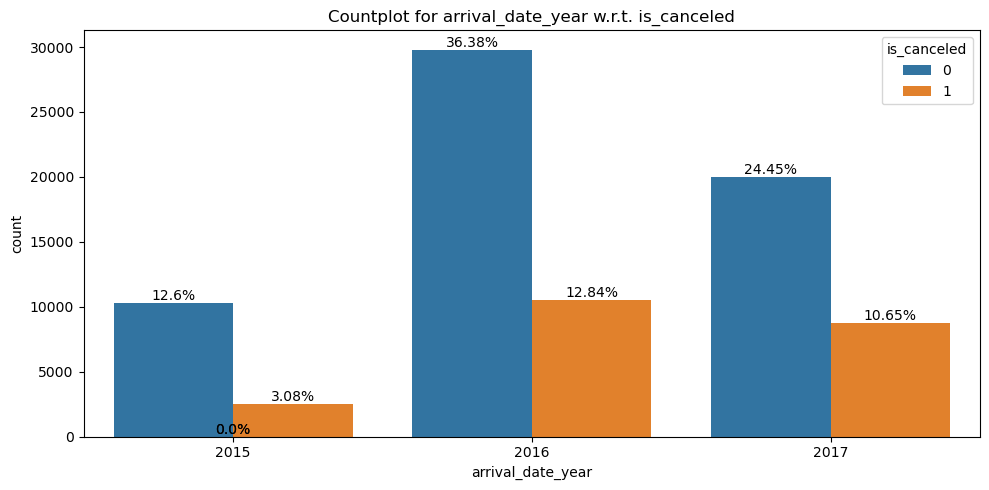

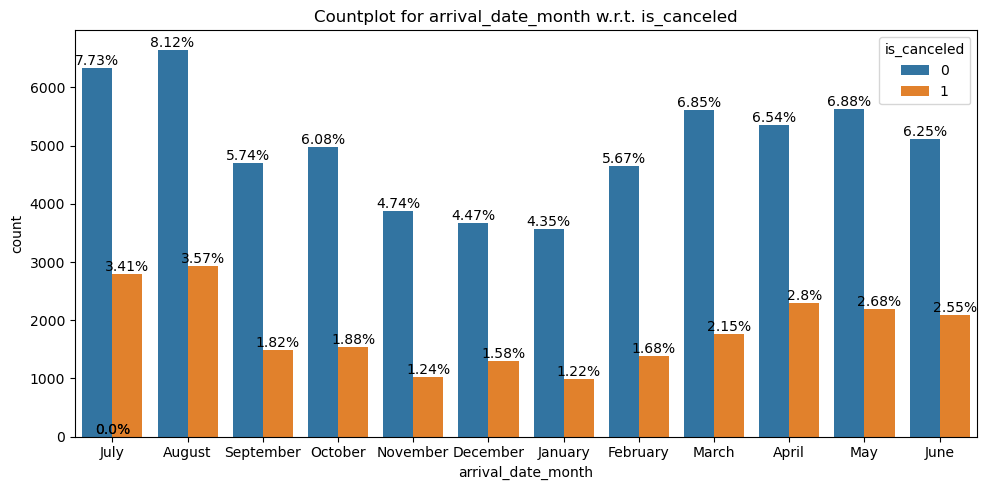

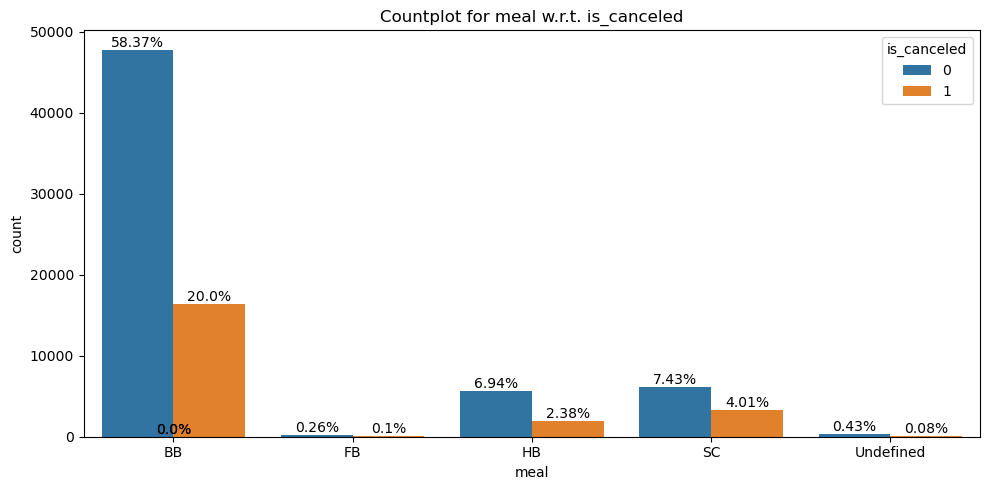

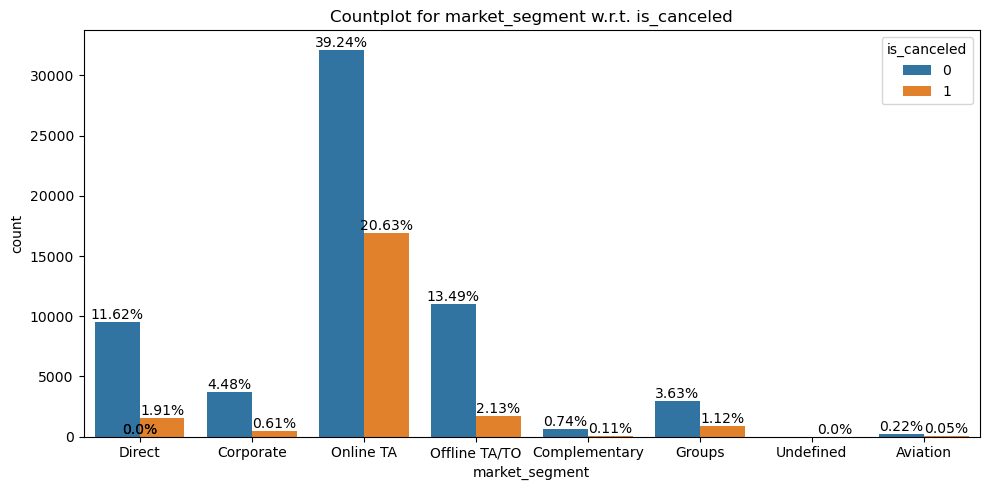

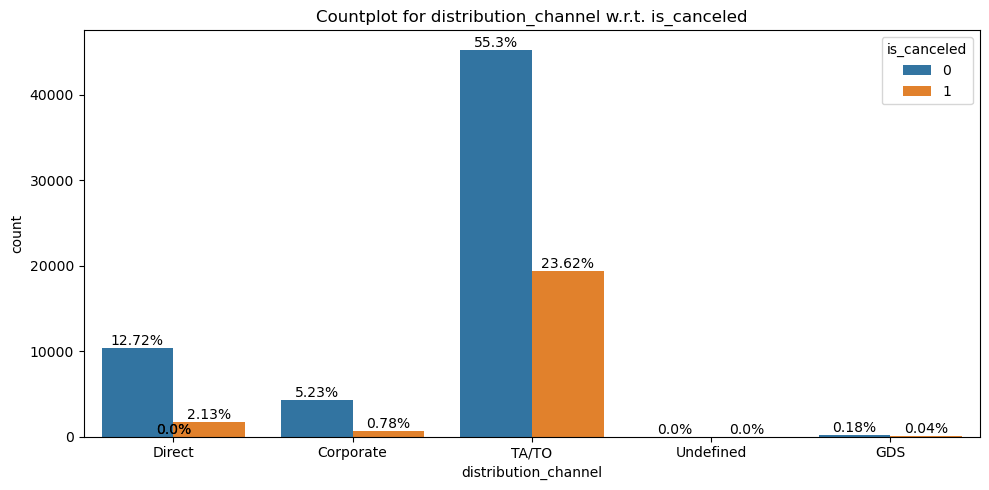

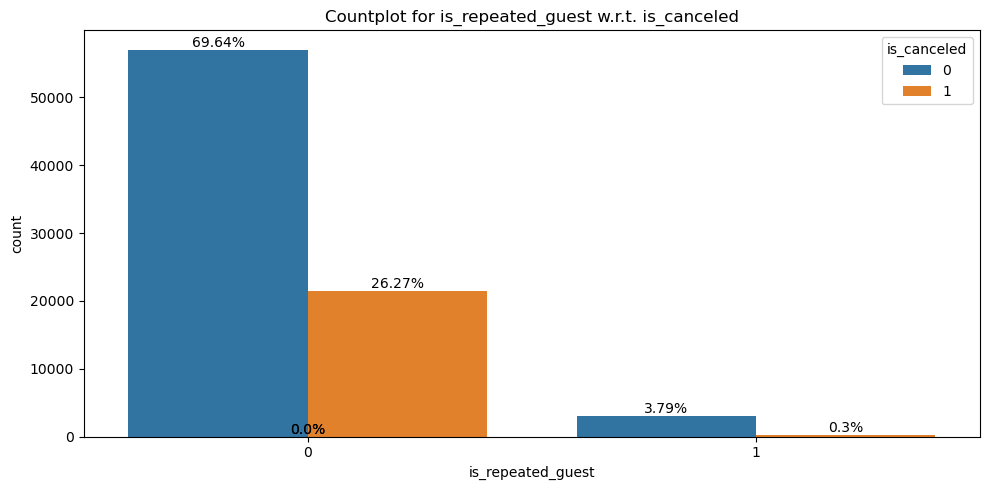

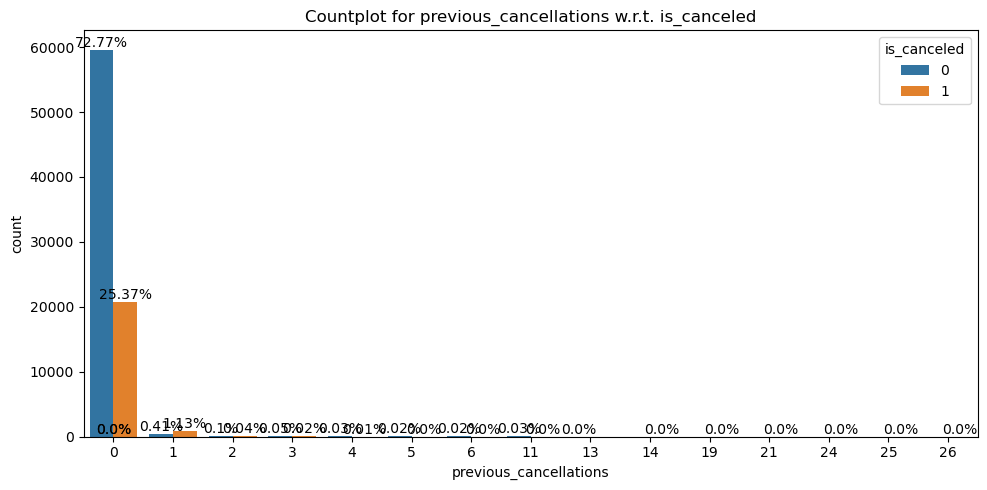

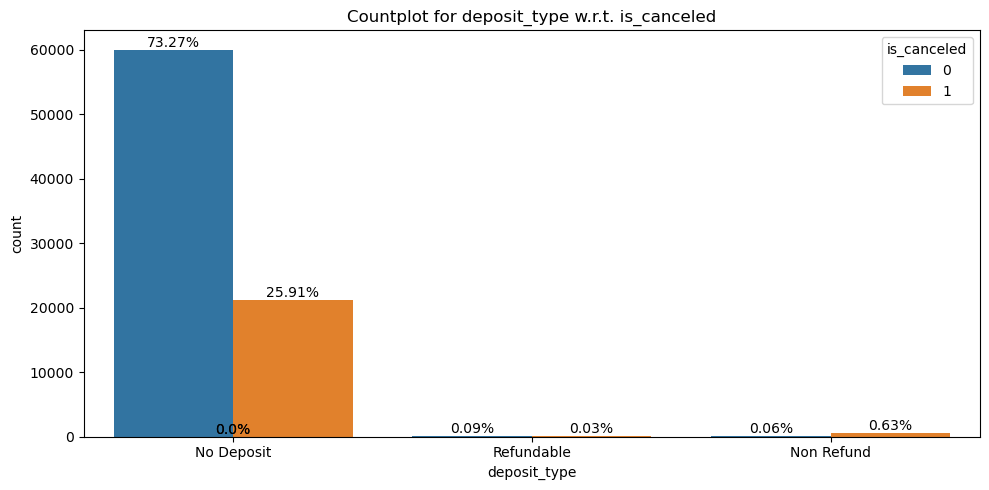

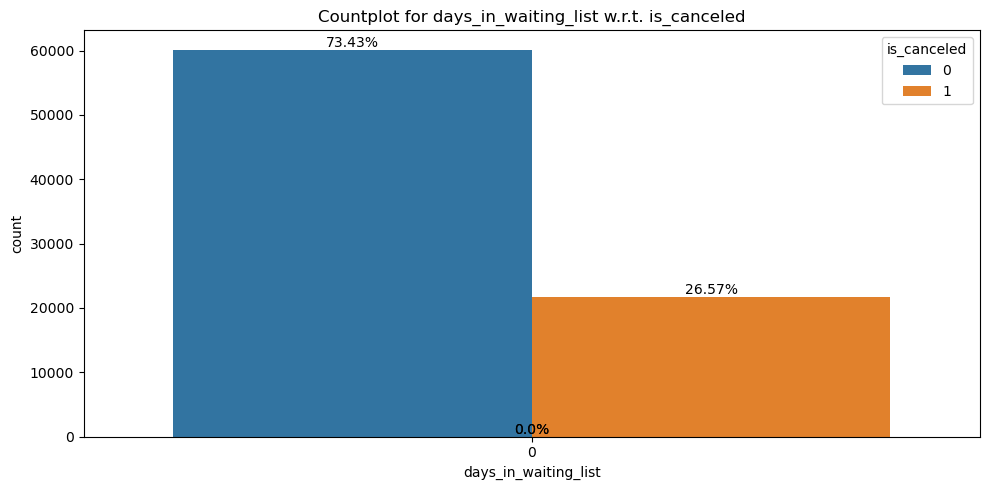

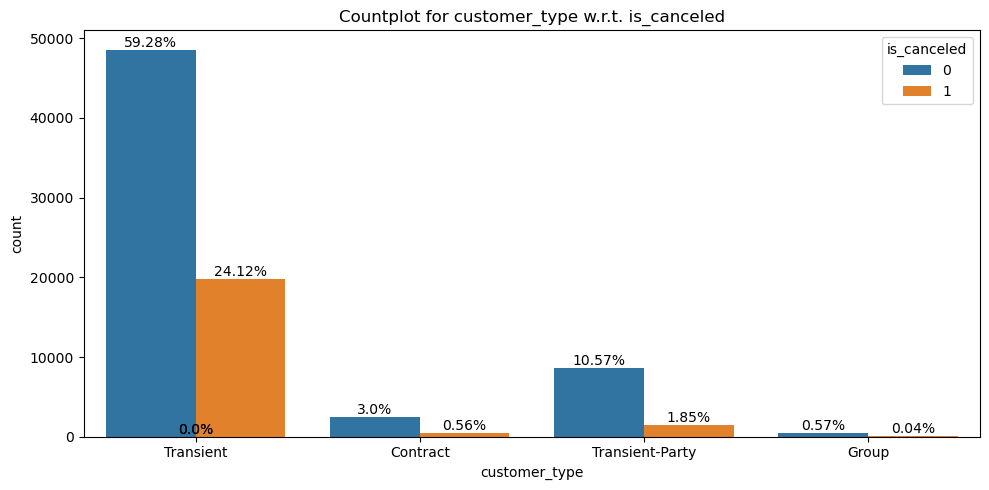

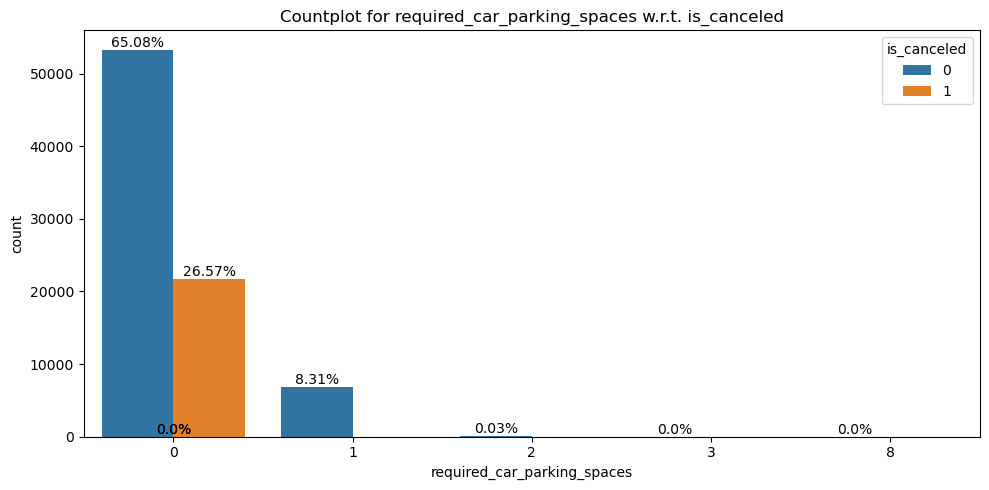

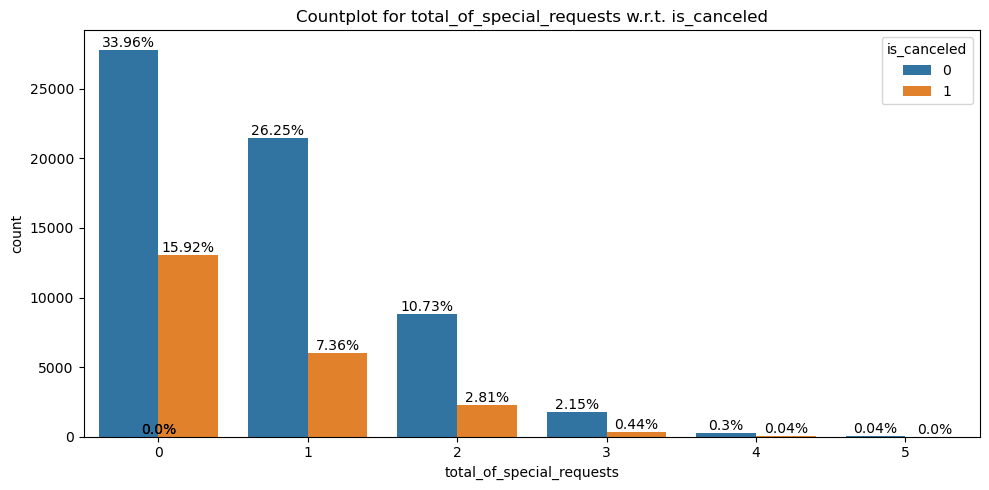

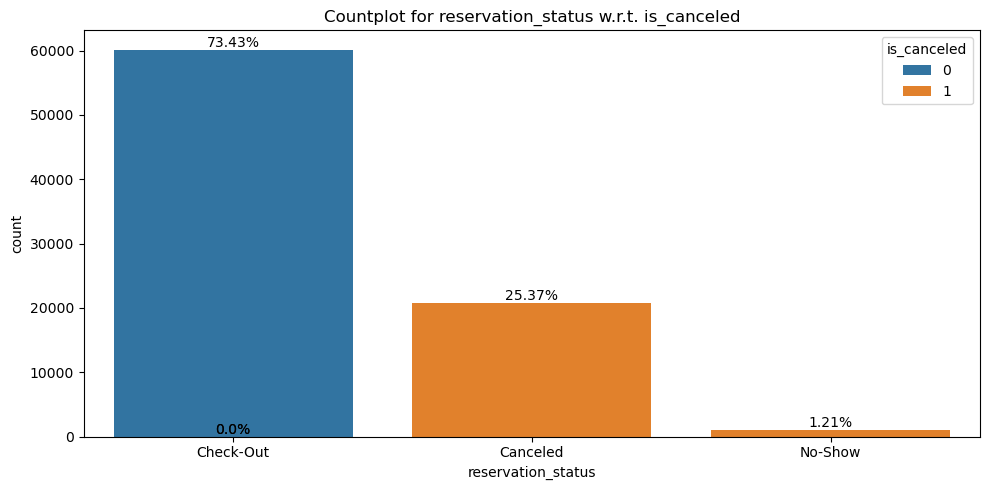

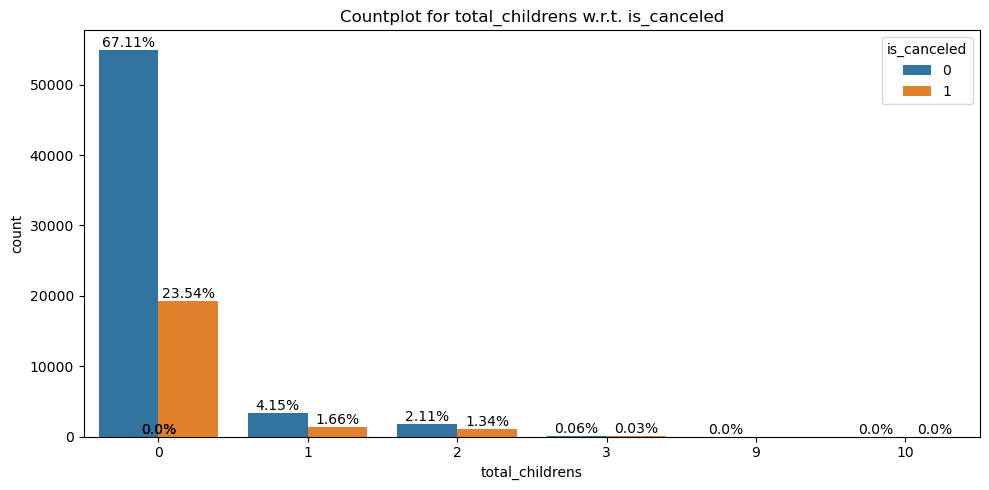

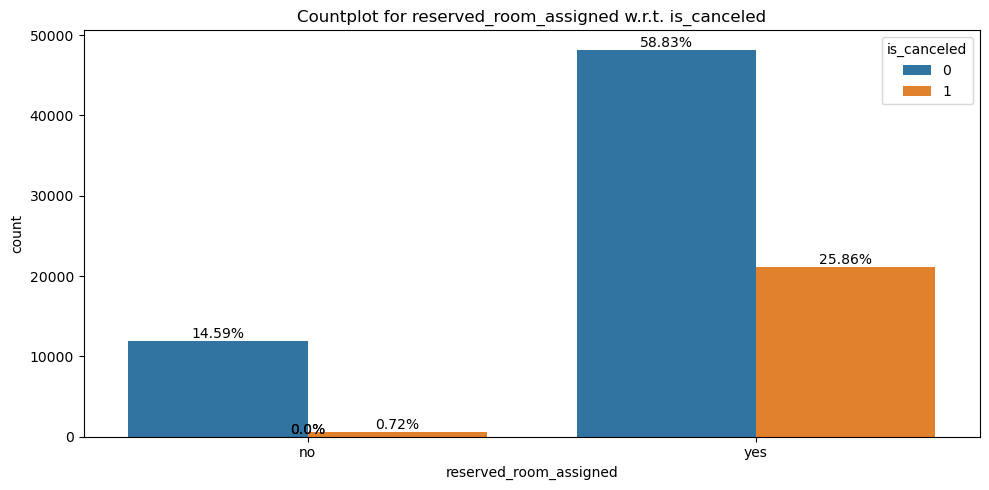

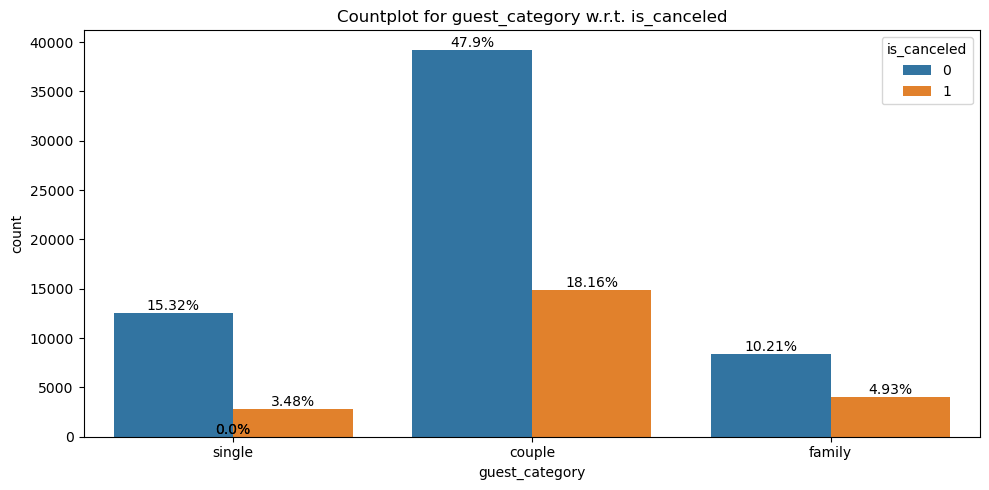

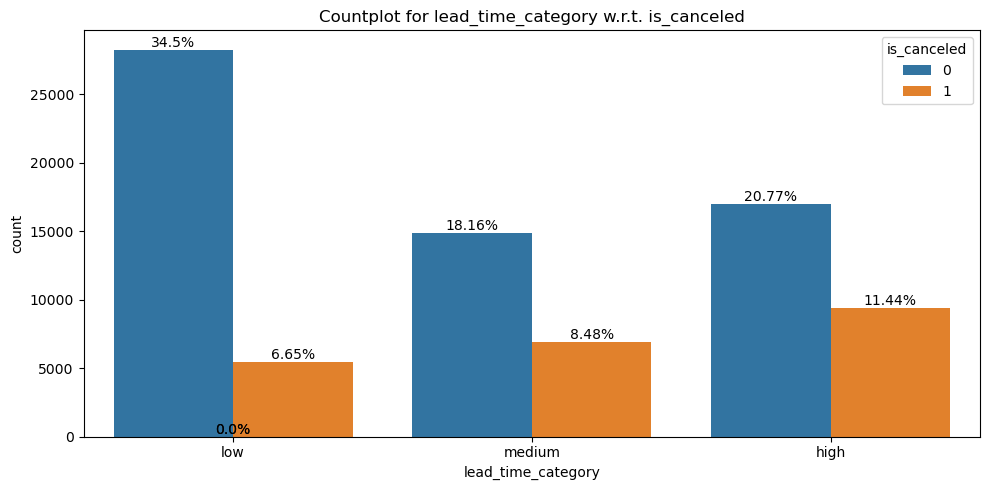

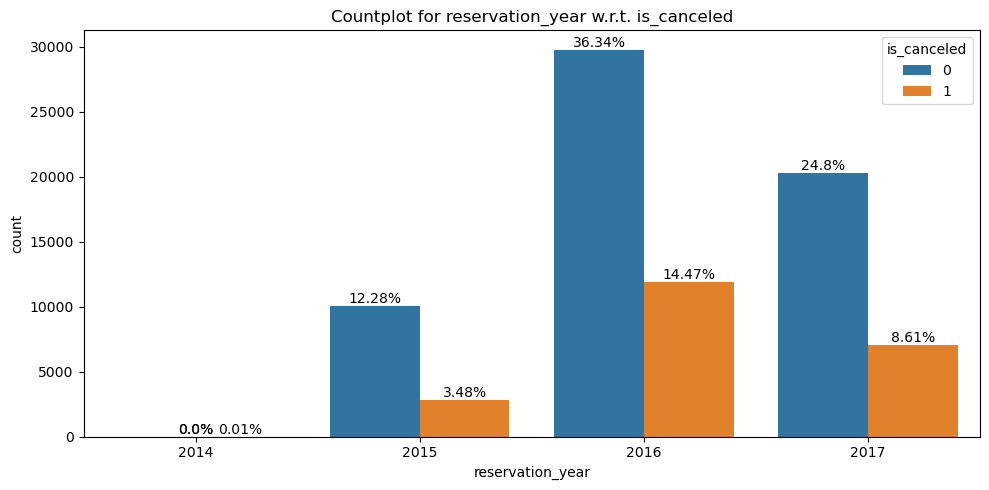

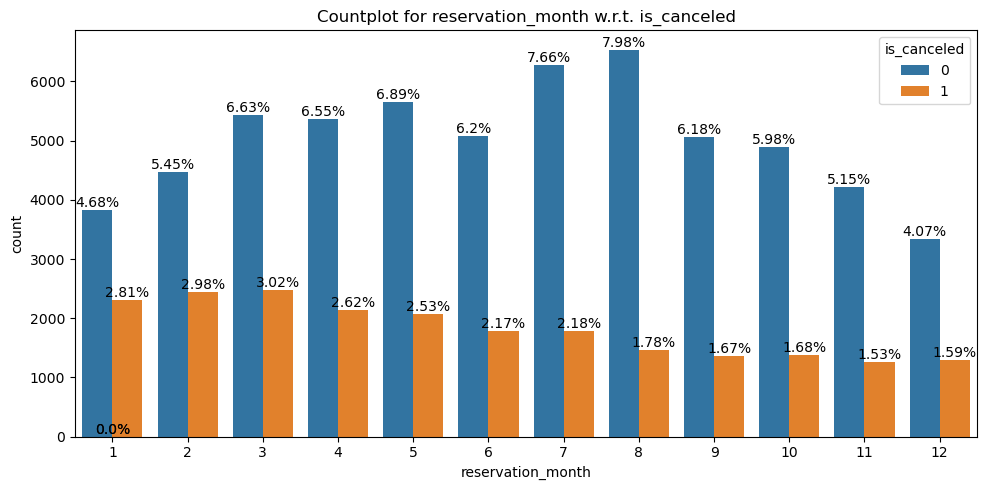

In [28]:
# Plotting countplots with respect to is_canceled and other variables
r = len(included_var)

for i, var in enumerate(included_var):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5)) 
    sns.countplot(x=df[var], hue='is_canceled', data=df, ax=ax)
    ax.set_title(f"Countplot for {var} w.r.t. is_canceled")
    annot_percent(ax)
    plt.tight_layout()
    plt.show()

- Observations:
    - Most of the customers booked City hotel than resort but city hotels has double cancellation rate than that of resort.
    - 27.49% which is almost 1/4 of customers who cancelled their booking.
    - In 2016 most of bookings were made by customers and number of bookings reduced by 12.24% in 2017 with constant cansallation rate.
    -Fromn April to August booking cancellation increase gradually with August is top with 4.15%. In November, December, January less number of booking were made by customers which is nearly 6%.
    We can give offer in this 3 month for increasing revenue in this 3 month.
    - "BB" type meal is all time favourite amonth all types of meal followed by 'SC' and 'HB', 'BB' meal is most ordered by customers amoung all.
    - 'FB' is very less number of time ordered food by customers.
    - Most booking were made through Online market segment followed by Offline TA/TO. Booking made though Aviation merket segament is less probability of booking cancellation followed by Corporate.
    - There is less probabilty that customer revisit. Only 3.91% customers were visited again.
    - Customer who previously cancelled booking are more chance they will cancel booking.
    - Customer intrested in booking with no deposite.
    - Transient type customers were made most number of booking followed by Transient-Party. We can offer booking made for group for generate more revenue through this type customers cause group type customers are lee in numbers who made booking.
    - Most of the customers not required space for parking but generally 1 is sufficient space for parking.
    - Customer can made 1 to 2 special request in booking period but most of the cutomers not asked for any special request.
    - Most of the customers are visit without childrens, can be change by taking several steps to boost visits of customers with childrens.
    - Reserved room not assigned is not reseaon of cancellation of bookings.
    - Most of the booking cancelled by customes who have assigned reserved room.
    - Most booking were made by couples followed by single people. Need to boost booking for family and single people.
    - More than 90 days prebooking has around 50% changes that booking will cancel. Most of the prebookings made for 1 month before.

In [29]:
df.head()

hotel  is_canceled  arrival_date_year arrival_date_month  \
2  Resort Hotel            0               2015               July   
3  Resort Hotel            0               2015               July   
4  Resort Hotel            0               2015               July   
6  Resort Hotel            0               2015               July   
7  Resort Hotel            0               2015               July   

   arrival_date_week_number  arrival_date_day_of_month meal country  \
2                        27                          1   BB     GBR   
3                        27                          1   BB     GBR   
4                        27                          1   BB     GBR   
6                        27                          1   BB     PRT   
7                        27                          1   FB     PRT   

  market_segment distribution_channel  is_repeated_guest  \
2         Direct               Direct                  0   
3      Corporate            Corporate                  0   
4      Online TA                TA/TO                  0   
6         Direct               Direct                  0   
7         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled  booking_changes  \
2                       0                               0                0   
3                       0                               0                0   
4                       0                               0                0   
6                       0                               0                0   
7                       0                               0                0   

  deposit_type  agent  days_in_waiting_list customer_type    adr  \
2   No Deposit      0                     0     Transient   75.0   
3   No Deposit    304                     0     Transient   75.0   
4   No Deposit    240                     0     Transient   98.0   
6   No Deposit      0                     0     Transient  107.0   
7   No Deposit    303                     0     Transient  103.0   

   required_car_parking_spaces  total_of_special_requests reservation_status  \
2                            0                          0          Check-Out   
3                            0                          0          Check-Out   
4                            0                          1          Check-Out   
6                            0                          0          Check-Out   
7                            0                          1          Check-Out   

   total_stays  total_childrens reserved_room_assigned guest_category  \
2            1                0                     no         single   
3            1                0                    yes         single   
4            2                0                    yes         couple   
6            2                0                    yes         couple   
7            2                0                    yes         couple   

  lead_time_category  reservation_year  reservation_month  reservation_day  
2                low              2015                  7                2  
3                low              2015                  7                2  
4                low              2015                  7                3  
6                low              2015                  7                3  
7                low              2015                  7                3

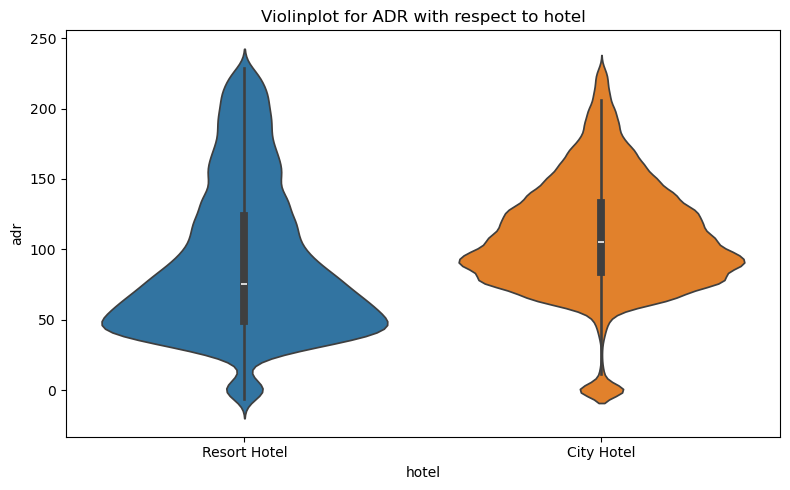

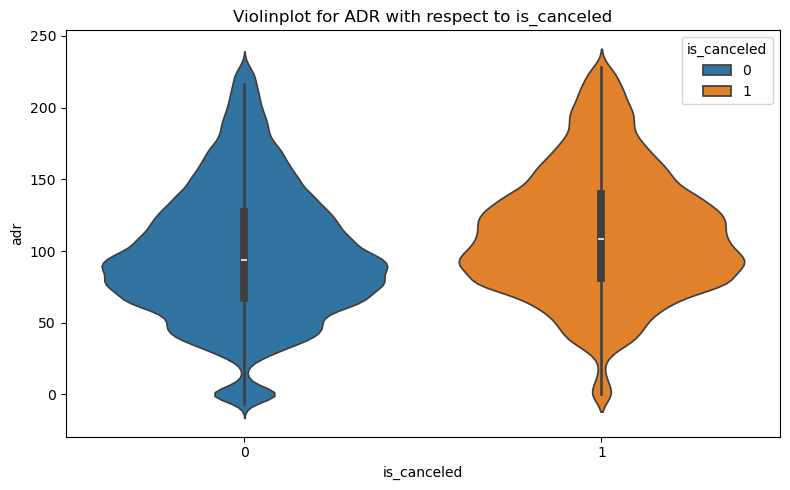

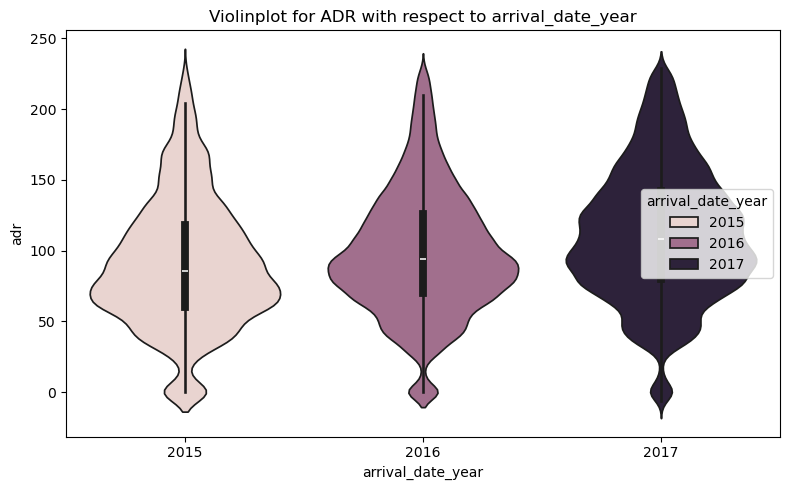

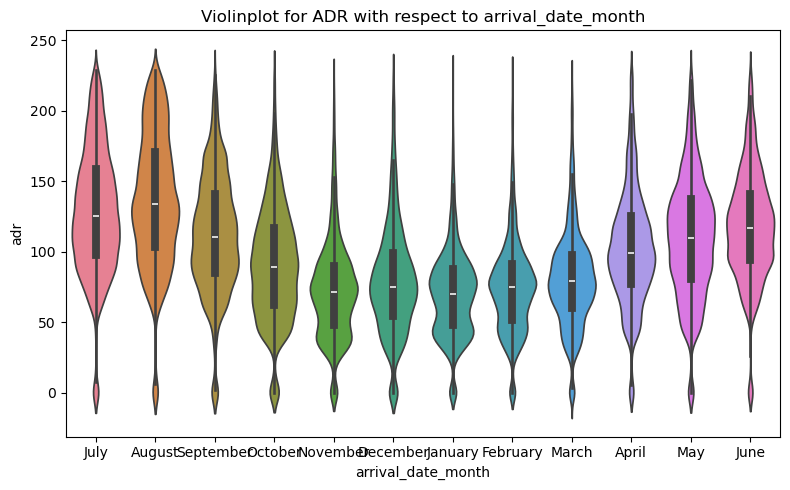

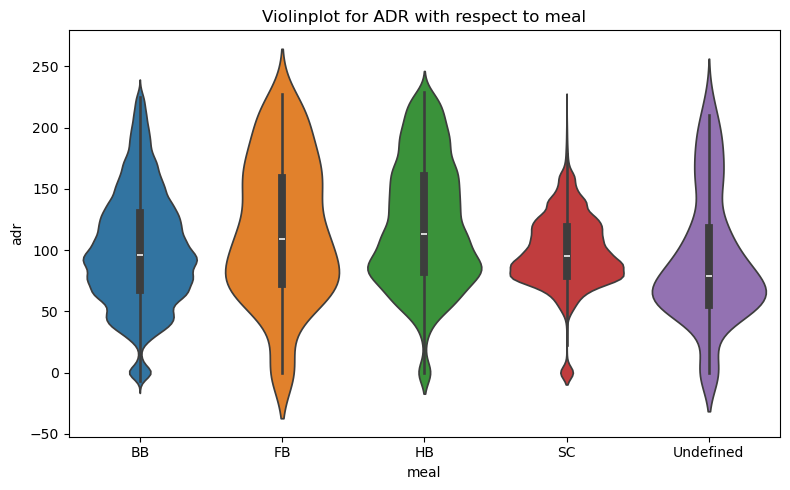

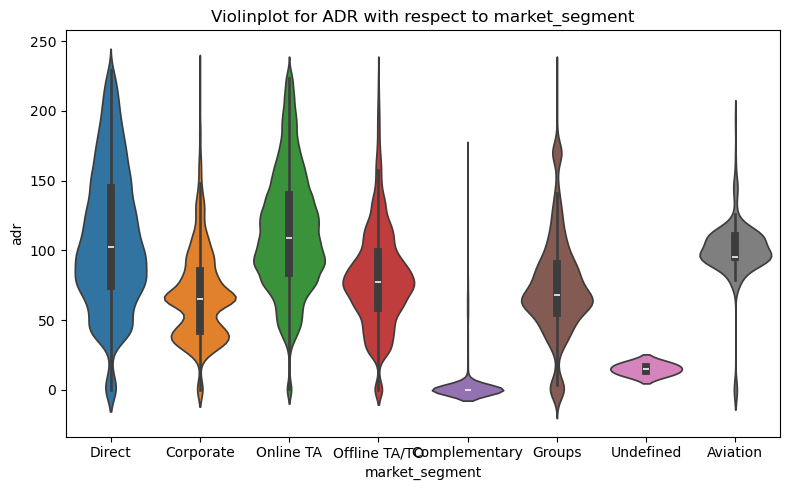

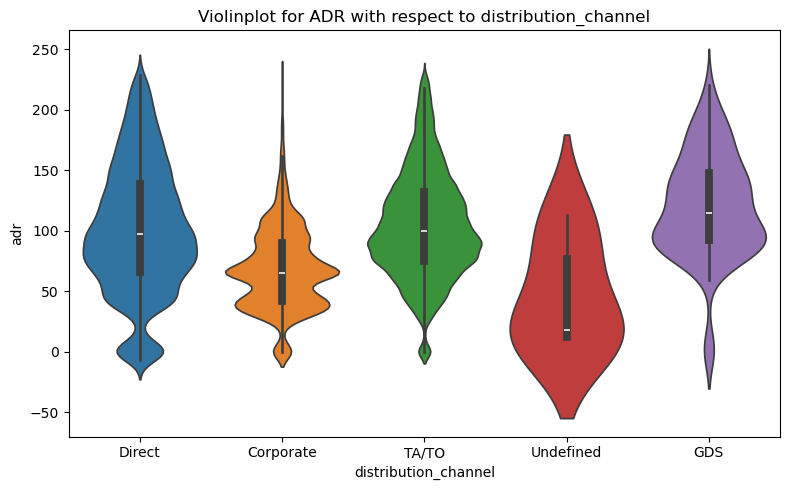

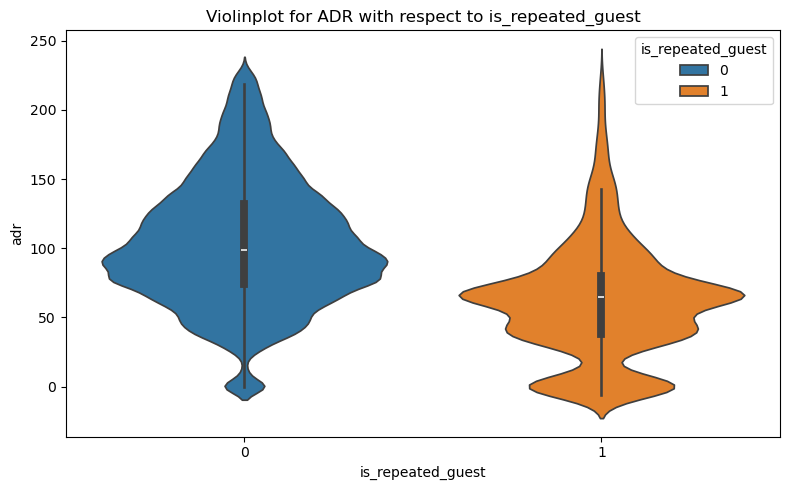

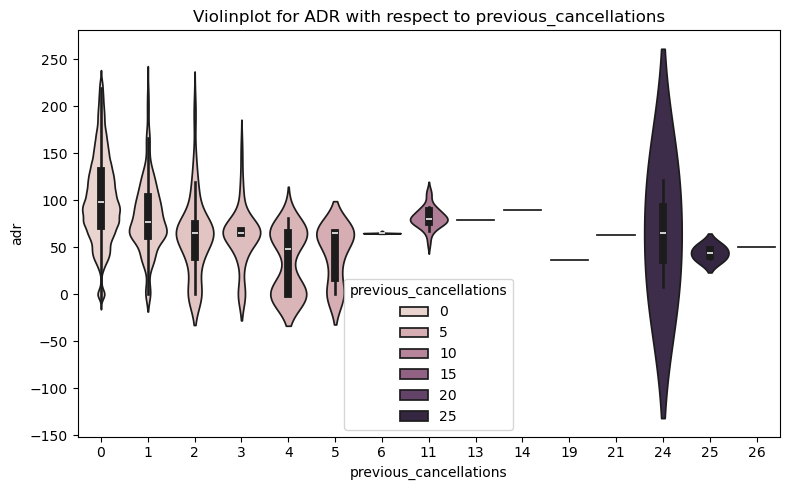

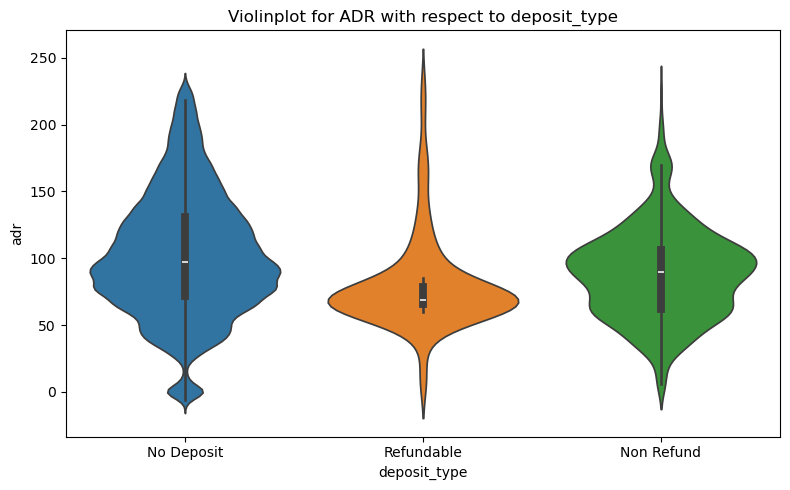

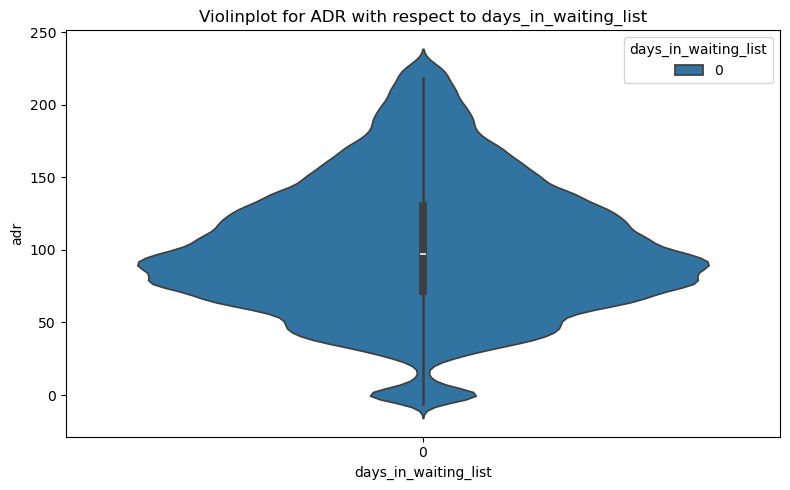

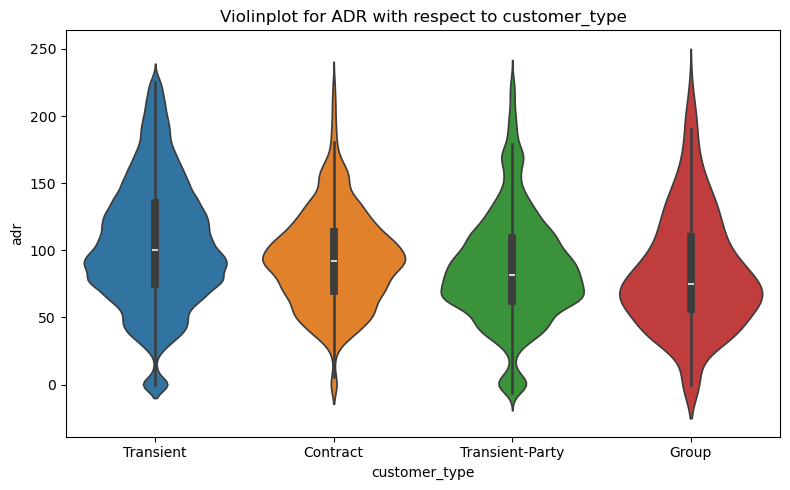

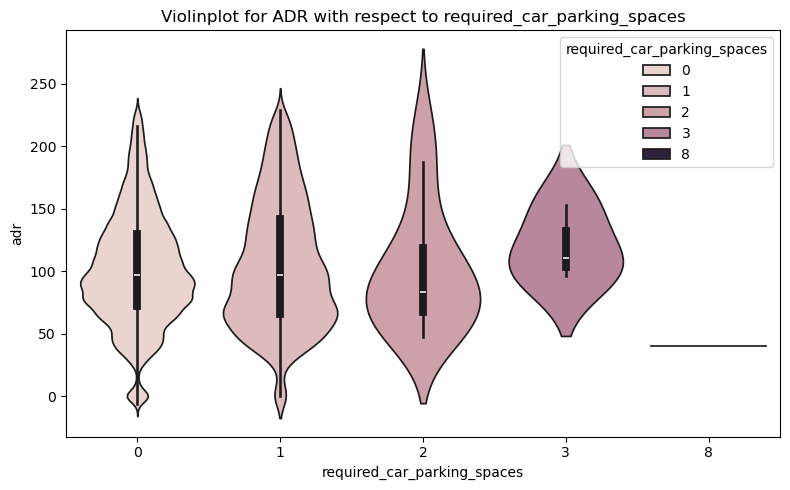

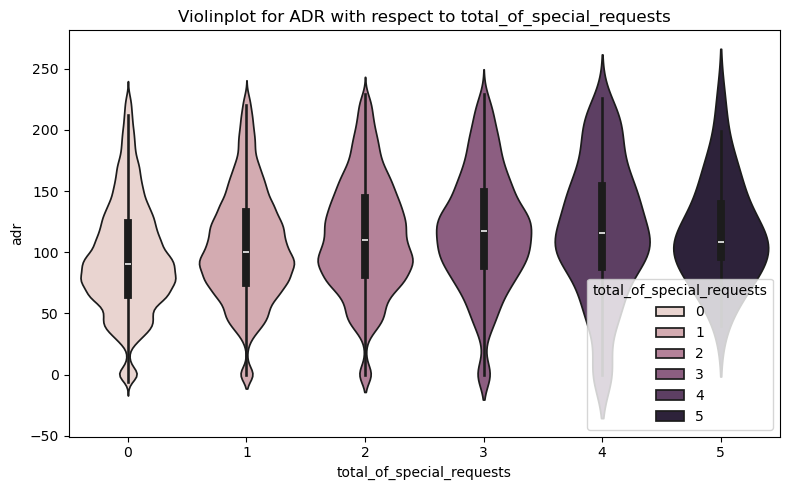

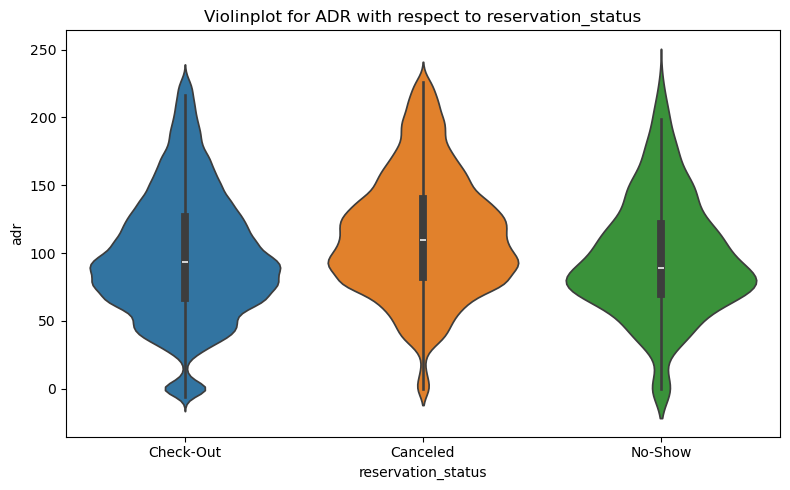

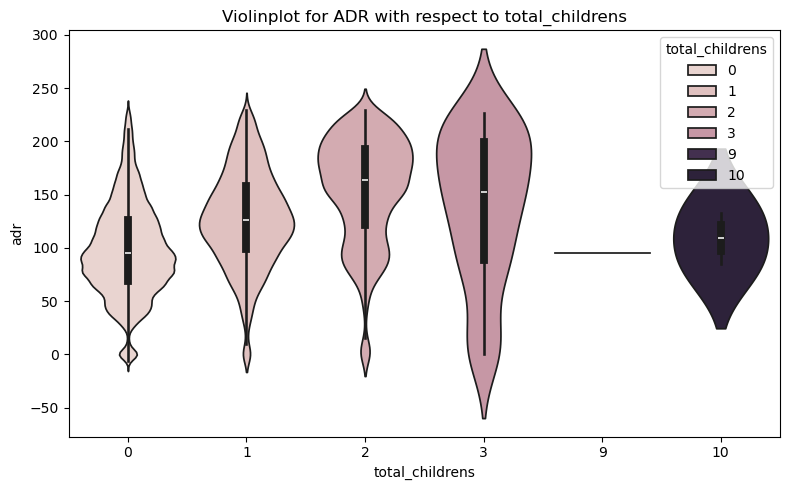

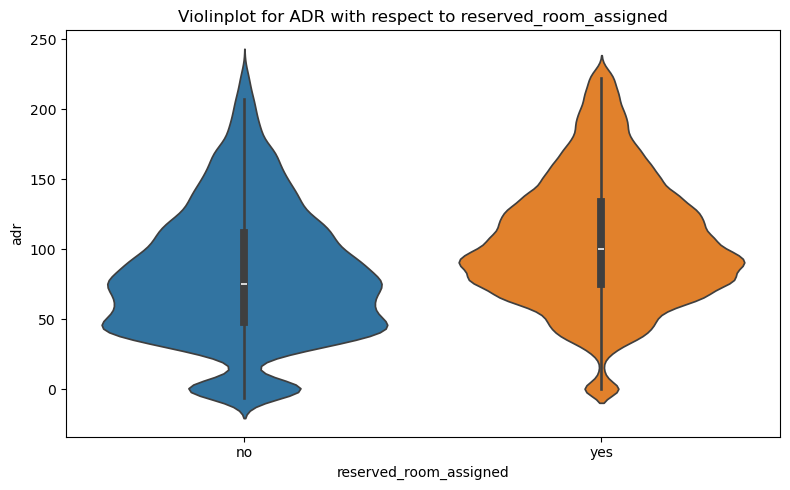

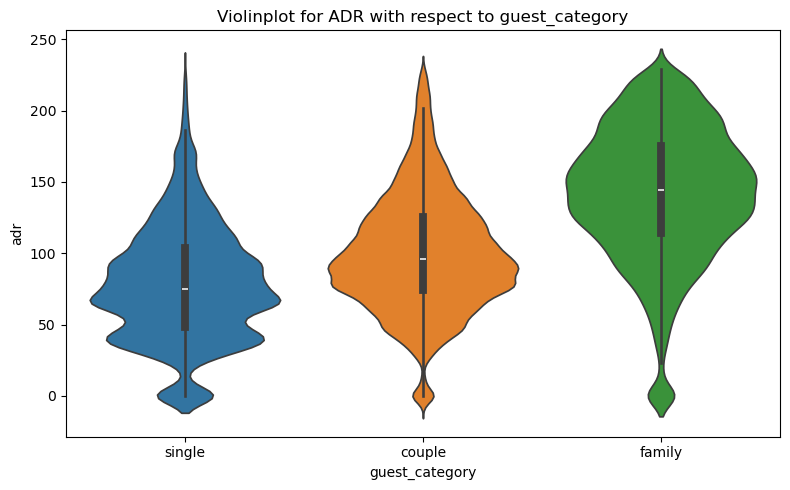

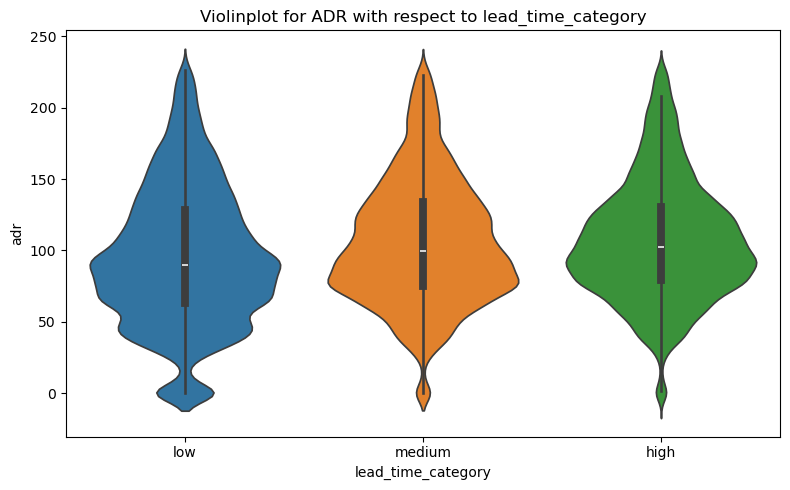

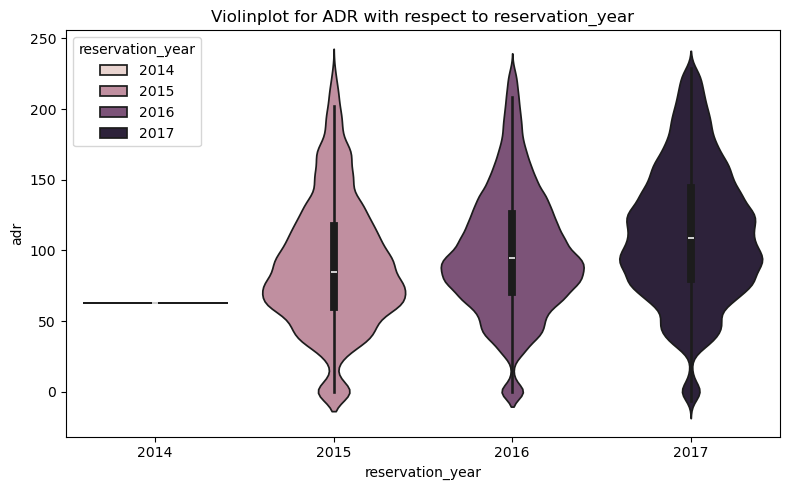

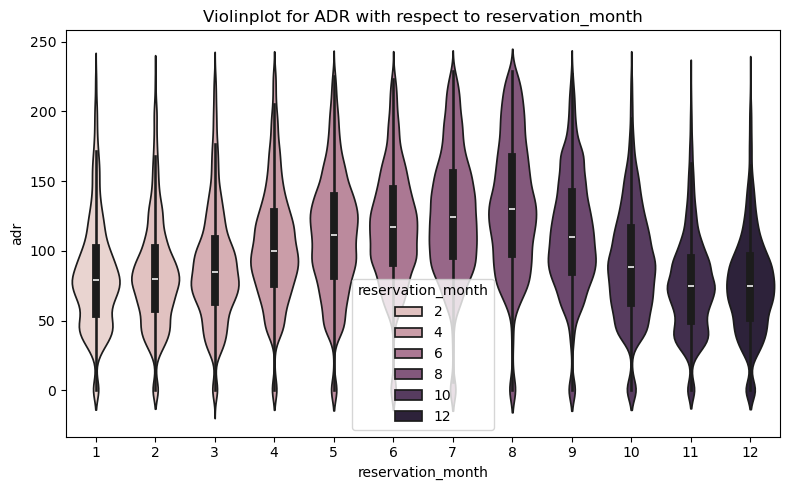

In [30]:
# Plotting bxplot with respect to ADR and other variables
for i, var in enumerate(included_var):
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    sns.violinplot(x=df[var], y='adr', hue=df[var], data=df, ax=ax)
    ax.set_title(f"Violinplot for ADR with respect to {var}")
    plt.tight_layout() 
    plt.show()

- Observations:
    - City hotels have a higher average daily rate (ADR) compared to resort hotels. That is city hotel are more expensive.
    - In 2017, highest ADR is generated. Increase in ADR year by year trend observed.
    - Average daily rate in August is high followed by July and June.
    - High ADR is not reason for booking cancellaton.
    - April, May, june, July, August and September have high ADR but at the end and beggining of the year low ADR can attract more customers and seen goodsign for pricing strategy.
    - HB meal has high ADR and SC meal has low ADR amoung all types of meal.
    - Corporate, Offline TA, Groups required more rooms and longer stays, that is order in bulk promoted by providing discounts on bulk order and increse longer relationship with customers. High ADR for online TA indicated that high commision for online trvell agencies demands.
    - For direct booking, most loyal customers direct books tickets and hotels needs to keep  competative ADR.
    - Repeated guest has lower ADR than new guest indicates that hotel provide discounts offers to their repeated guest to atract them.
    - Guest who previously cancelled booking more than 1 times seen low ADR compared to new guest. Organization should charge slighly higher ADR who cancelled booking previously.
    - Booking with no deposite ha high ADR than that of refundable and non refundable. Hotel should charge low ADR for non refundable booking to attract customers without canceelation of booking due to bookings are non refundable in nature. It will reduce cancellation rate.
    - Hotel charges high ADR for guest with  more than 1 childrens.
    - Hotel charged slightly  lower ADR for guest who have not assigned reserved room. This pricing strategy maintain guest's interest and keeps them engaged with hotel.
    - Higher ADR charged for bookings made for family. More rooms required for booking made for family than that of booking made for single and couple guest.
    - Equal ADR for low, medium and high lead time observed. Hotel should charge high for last minuite booking and low ADR for early bookings. This pricing strategy increase revenue.

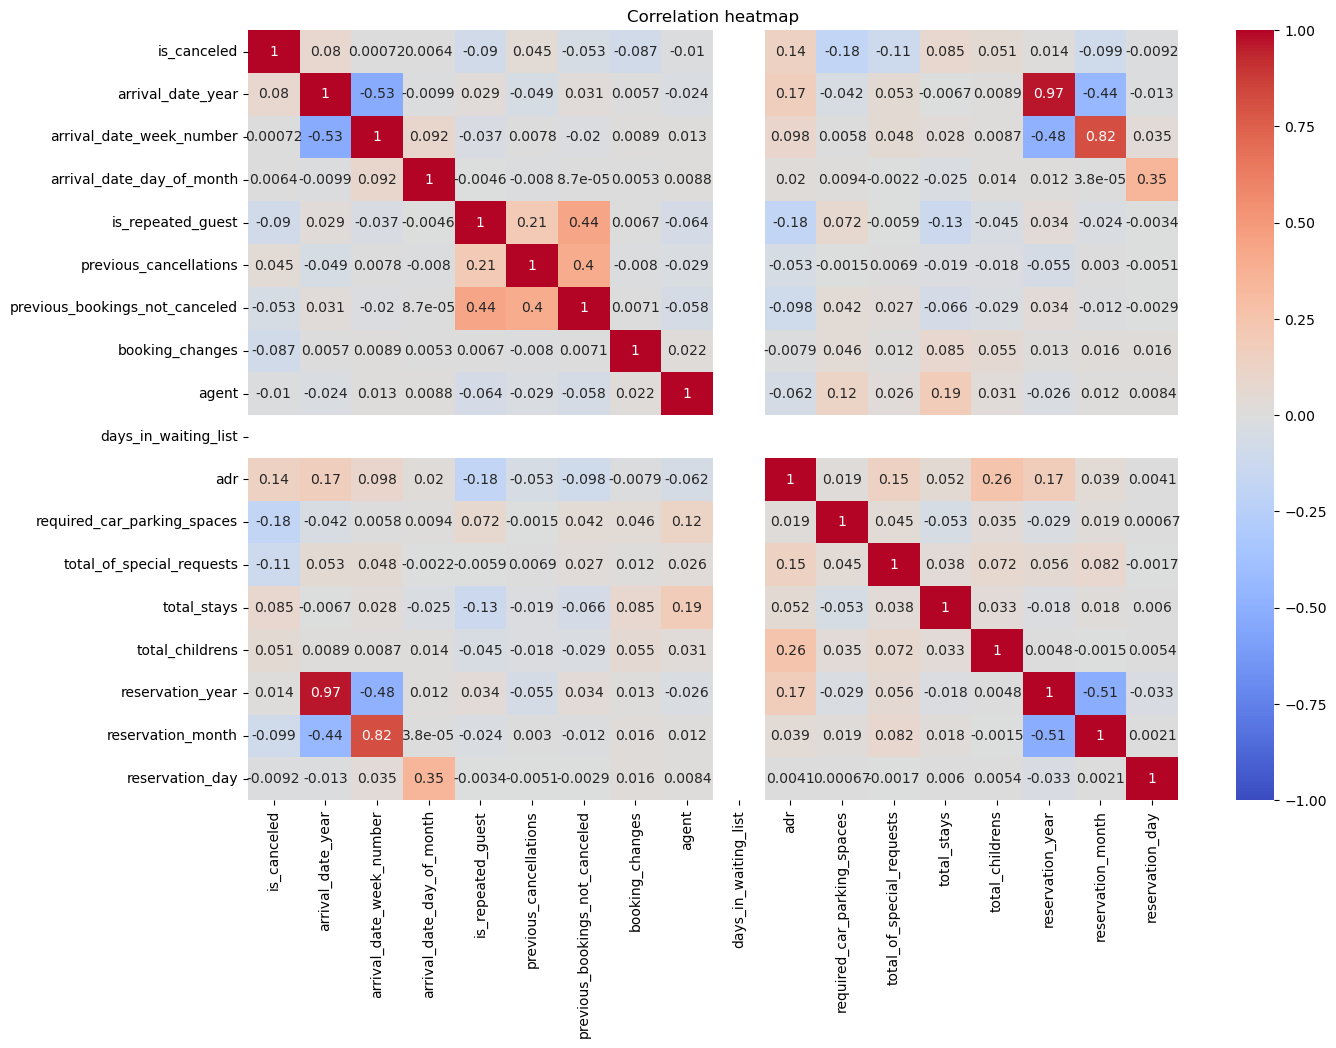

In [31]:
## Correlation heatmap 

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the correlation graph
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.title('Correlation heatmap')
plt.show()

-  Is_canceled has slightly correlation with ADR that imply that cancellation not merginaly influenced by room rate.
-  is_reapeated_guest has moderate correlation with previous_booking_not_cancelled indicates that repeated guest less probabilty that they will cancel bookings.
-  adr has moderate correlation with total_childrens indicates that room rate influenced by room rate.

<Figure size 2500x2500 with 0 Axes>

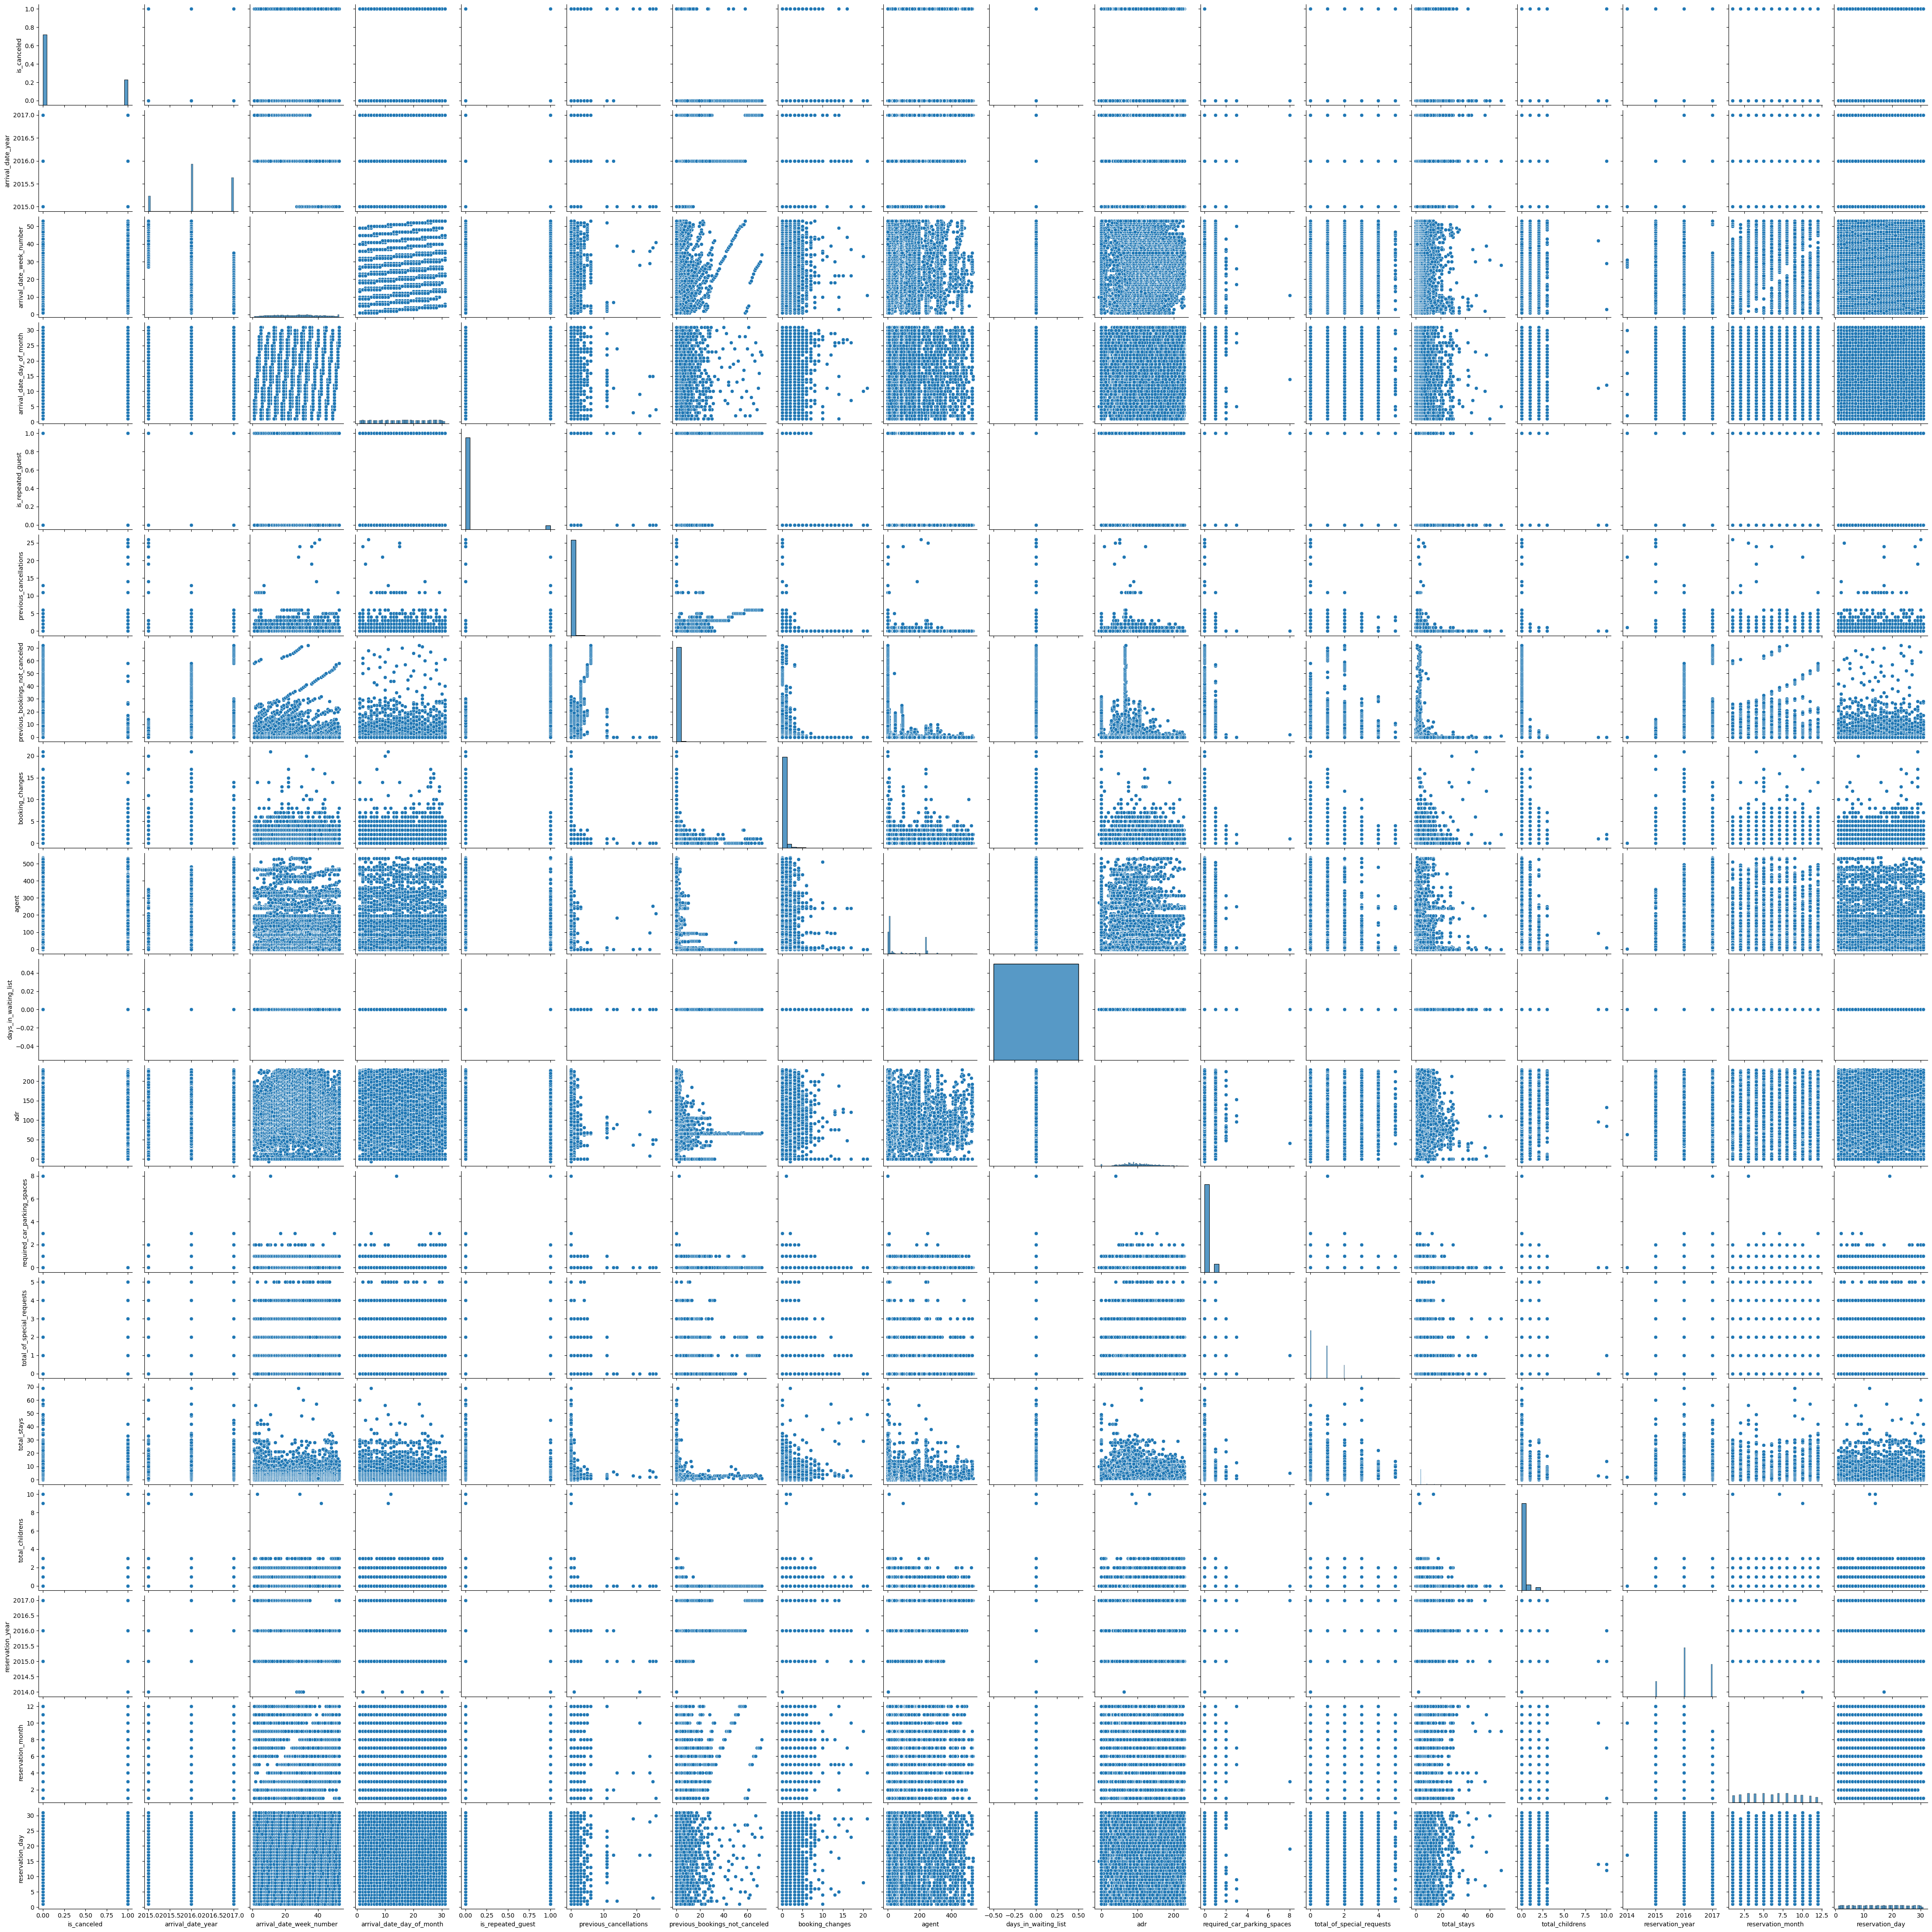

In [32]:
# Pair Plot
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

- Observations :
    - The relationship between lead_time and is_canceled indicates that a greater lead time does not result in cancellations of bookings. 
    - The lead_time and arrival_date_year graphs show that individuals were consistently interested in reserving bookings in advance in 2015, 2016, and 2017. 
    - According to the graph of arrival_date_year and days_in_waiting_list, 2016 had the greatest wait time for room bookings.
    - The graph of ADR and days_in_waiting_list shows that a short minimum waiting period for bookings leads to a high ADR. 
    - Based on the graphs of "is_canceled" and "days_in_waiting_list," we conclude that waiting for bookings is not a valid reason for cancellation.

#### Hypothesis Testing

Hypothesis 1 : Customers booking more than 3 months in advance are more likely to cancel.

In [33]:
## Performing hypothesis testing using chisqure test

from scipy.stats import chi2_contingency

# Defining null and alternative hypothesis
H0 = 'The proportion of cancellations is the same for bookings with low, medium, and high lead times.'
H1 = 'The proportion of cancellations differs significantly among bookings with low, medium, and high lead times.'

# Create contingency table
contingency_table = pd.crosstab(df['lead_time_category'], df['is_canceled'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

# Interpret result from p-value
if p < 0.05:
    print(f"Reject the null hypothesis: {H1}")
else:
    print(f"Fail to reject the null hypothesis: {H0}")

Chi-Square Test Statistic: 3264.3343561379124
P-Value: 0.0
Degrees of Freedom: 2
Reject the null hypothesis: The proportion of cancellations differs significantly among bookings with low, medium, and high lead times.


Hypothesis 2: There is a significant difference in ADR across different guest types.

In [34]:
## Performing hypothesis testing

H0 = 'There is no significant difference in ADR across different guest types.'
H1 = 'There is a significant difference in ADR across different guest types.'

from scipy.stats import f_oneway

# Extract ADR values for each guest type
single = df[df['guest_category'] == 'single']['adr']
couple = df[df['guest_category'] == 'couple']['adr']
family = df[df['guest_category'] == 'family']['adr']

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(single, couple, family)

# Print results
print(f"ANOVA test statistic: {f_stat}")
print(f"ANOVA test p-value: {p_value}")

# Interpret result from p-value
if p_value < 0.05:
    print(f"{H1}")
else:
    print(f"{H0}")

ANOVA test statistic: 8057.448996697706
ANOVA test p-value: 0.0
There is a significant difference in ADR across different guest types.


Hypothesis 3: ADR differs among bookings with different deposit types.

In [35]:
## Performing hypothesis operation 

# Define null and alternative hypotheses
H0 = 'The average daily rate is the same for bookings with different deposit types.'
H1 = 'The average daily rate differs significantly among bookings with different deposit types.'

from scipy.stats import f_oneway

# Extract ADR values for each deposit type
no_deposit = df[df['deposit_type'] == 'No Deposit']['adr']
non_refund = df[df['deposit_type'] == 'Non Refund']['adr']
refundable = df[df['deposit_type'] == 'Refundable']['adr']

# Perform One-Way ANOVA
f_stat, p_val = f_oneway(no_deposit, non_refund, refundable)

# Print results
print(f"Test statistic: {f_stat}")
print(f"p-value: {p_val}")

# Interpret result from p-value
if p_value < 0.05:
    print(f"{H1}")
else:
    print(f"{H0}")

Test statistic: 38.15590075823831
p-value: 2.7341190409313638e-17
The average daily rate differs significantly among bookings with different deposit types.


#### Model Development

In [37]:
## Preprocessing data 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

# Split the data into dependent and independent features
X = df.drop(columns='is_canceled')
y = df['is_canceled']

# Ensure uniform data types in categorical columns before encoding
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype(str)

# Handling categorical variables using Label Encoding
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scaling numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_resampled, y_resampled)

  File "c:\Users\ajitm\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ajitm\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ajitm\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ajitm\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [39]:
# Define models and parameters for GridSearchCV
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier()
}

params = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'DecisionTree': {'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
}

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)

# Evaluate models using GridSearchCV
for name, model in models.items():
    grid = GridSearchCV(estimator=model, param_grid=params[name], cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Best model
    best_model = grid.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Display metrics
    print(f"{name} Model:")
    print(f"Best Parameters: {grid.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")

RandomForest Model:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[12019     0]
 [    0 12040]]


LogisticRegression Model:
Best Parameters: {'C': 0.1}
Accuracy: 0.9780
Precision: 1.0000
Recall: 0.9561
F1 Score: 0.9775
Confusion Matrix:
[[12019     0]
 [  529 11511]]


DecisionTree Model:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[12019     0]
 [    0 12040]]




- The Logistic Regression model performs exceptionally well, accurately predicting whether a customer will cancel bookings or not.